In [1]:
pip install ipywidgets==7.0.0 --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install catboost --user
!pip install optuna --user

In [3]:
import catboost
import optuna
from scipy import stats
import datetime as dt
import time
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
from catboost import Pool
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.metrics import *
from catboost import CatBoostRegressor
import math
from sklearn import tree, model_selection
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [5]:
pd.set_option("display.max_rows", 100)

In [6]:
train.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [7]:
X = train.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature","Id"], axis=1)

In [8]:
X.nunique().sort_values()

Street              2
CentralAir          2
Utilities           2
BsmtHalfBath        3
HalfBath            3
GarageFinish        3
LandSlope           3
PavedDrive          3
Fireplaces          4
KitchenQual         4
KitchenAbvGr        4
ExterQual           4
BsmtQual            4
BsmtCond            4
LandContour         4
LotShape            4
FullBath            4
BsmtExposure        4
BsmtFullBath        4
MasVnrType          4
ExterCond           5
GarageQual          5
Electrical          5
HeatingQC           5
BldgType            5
YrSold              5
LotConfig           5
MSZoning            5
GarageCond          5
GarageCars          5
SaleCondition       6
GarageType          6
Heating             6
BsmtFinType1        6
Foundation          6
RoofStyle           6
BsmtFinType2        6
Functional          7
RoofMatl            8
PoolArea            8
HouseStyle          8
Condition2          8
BedroomAbvGr        8
OverallCond         9
Condition1          9
SaleType  

In [9]:
c_n_housing = X.columns.values.tolist()
c_n_housing.remove("SalePrice")
c_n_housing

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',

In [10]:
X.dtypes.sort_values()

MSSubClass         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
BsmtFinSF2         int64
BsmtFinSF1         int64
SalePrice          int64
OverallQual        int64
LotArea            int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
GarageYrBlt      float64
GarageFinish      object
Condition2        object
Condition1        object
GarageQual        object


In [11]:
X = X.astype({'GarageFinish' : 'category' ,'Condition2' : 'category' ,'Condition1' : 'category',
'GarageQual' : 'category','GarageCond' : 'category','BsmtExposure' : 'category','Neighborhood' : 'category',
'LandSlope' : 'category','LotConfig' : 'category','Utilities' : 'category','LandContour' : 'category',
'LotShape' : 'category','Street' : 'category','MSZoning' : 'category','SaleType' : 'category',
'PavedDrive' : 'category','GarageType' : 'category','HouseStyle' : 'category','Functional' : 'category',
'BsmtFinType1' : 'category','BsmtQual' : 'category','BsmtFinType2' : 'category','Foundation' : 'category',
'ExterCond' : 'category','ExterQual' : 'category','SaleCondition' : 'category','HeatingQC' : 'category',
'CentralAir' : 'category','Electrical' : 'category','MasVnrType' : 'category','Exterior2nd' : 'category',
'Exterior1st' : 'category','RoofMatl' : 'category','RoofStyle' : 'category','KitchenQual' : 'category',
'BsmtCond' : 'category','BldgType' : 'category','Heating' : 'category'})
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
X.dtypes.sort_values()

Heating             int8
ExterQual           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinType2        int8
SaleCondition       int8
HeatingQC           int8
CentralAir          int8
Electrical          int8
PavedDrive          int8
GarageCond          int8
GarageQual          int8
GarageFinish        int8
GarageType          int8
Functional          int8
MasVnrType          int8
Exterior2nd         int8
ExterCond           int8
RoofMatl            int8
MSZoning            int8
SaleType            int8
Street              int8
LotShape            int8
LandContour         int8
Utilities           int8
LotConfig           int8
LandSlope           int8
Neighborhood        int8
Condition1          int8
Exterior1st         int8
KitchenQual         int8
Condition2          int8
RoofStyle           int8
BldgType            int8
HouseStyle          int8
OpenPorchSF        int64
Fireplaces         int64


['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The correlation between  TotalBsmtSF  and SalesPrice is =  0.6135805515591954
The correlation between  1stFlrSF  and SalesPrice is =  0.6058521846919148
The correlation between  GrLivArea  and SalesPrice is =  0.7086244776126521
The correlation between  GarageArea  and SalesPrice is =  0.6234314389183621
['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']


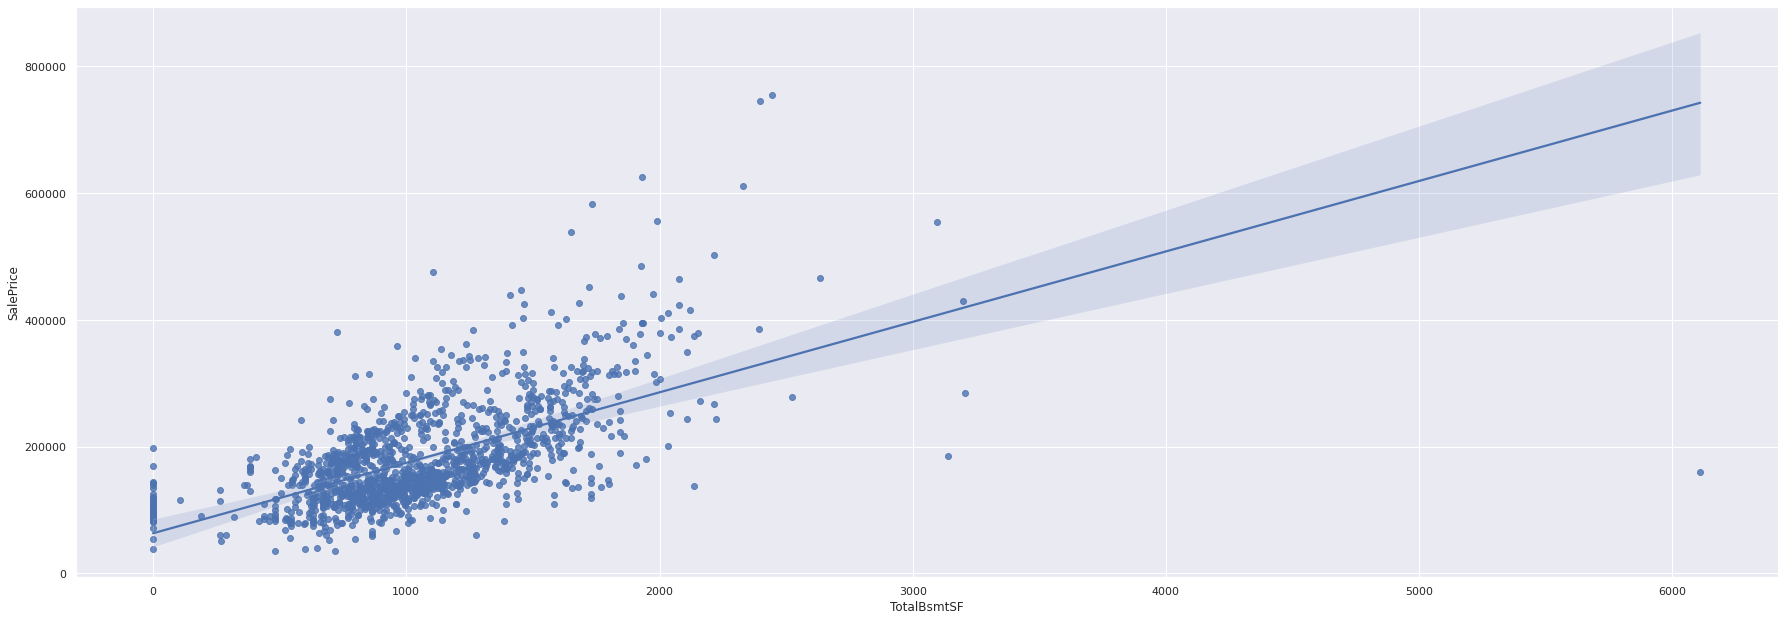

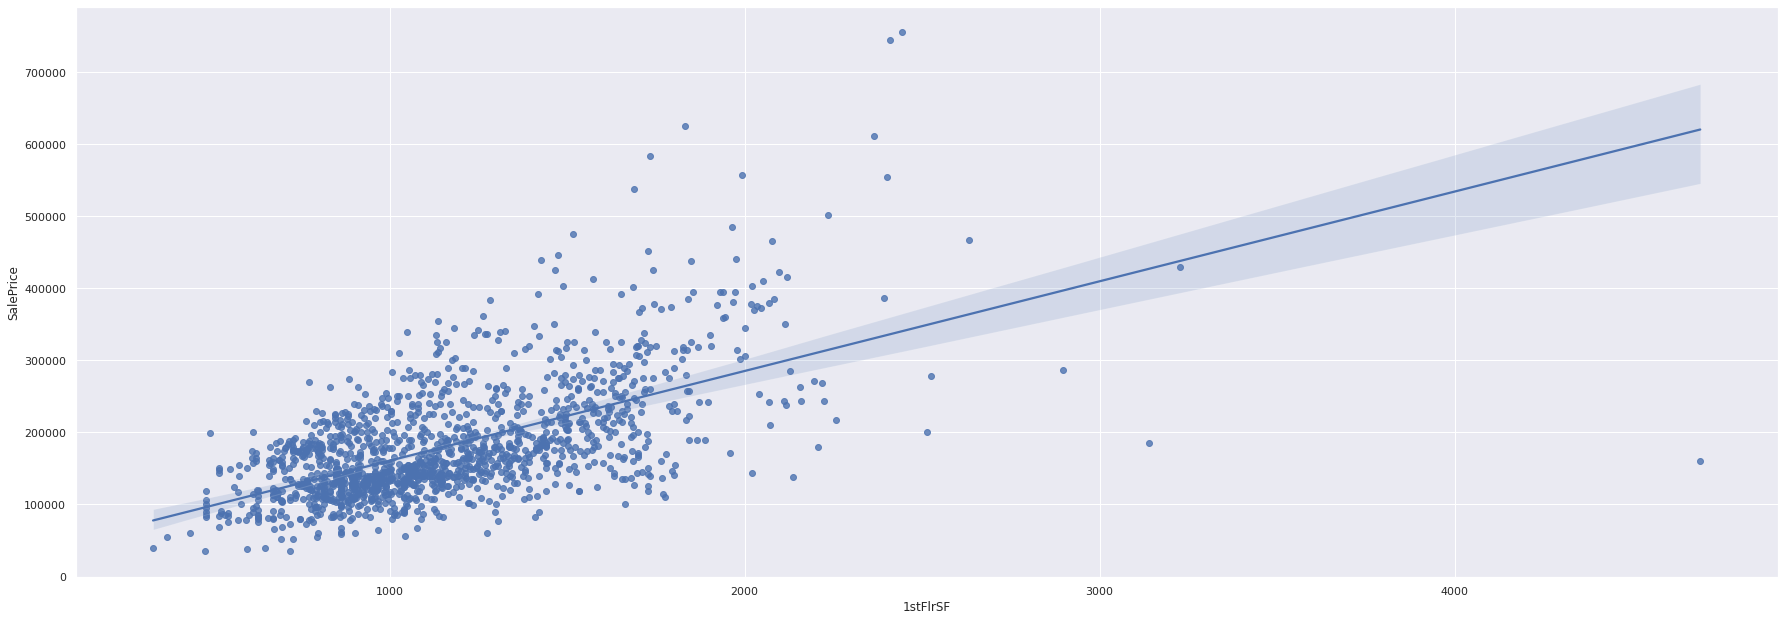

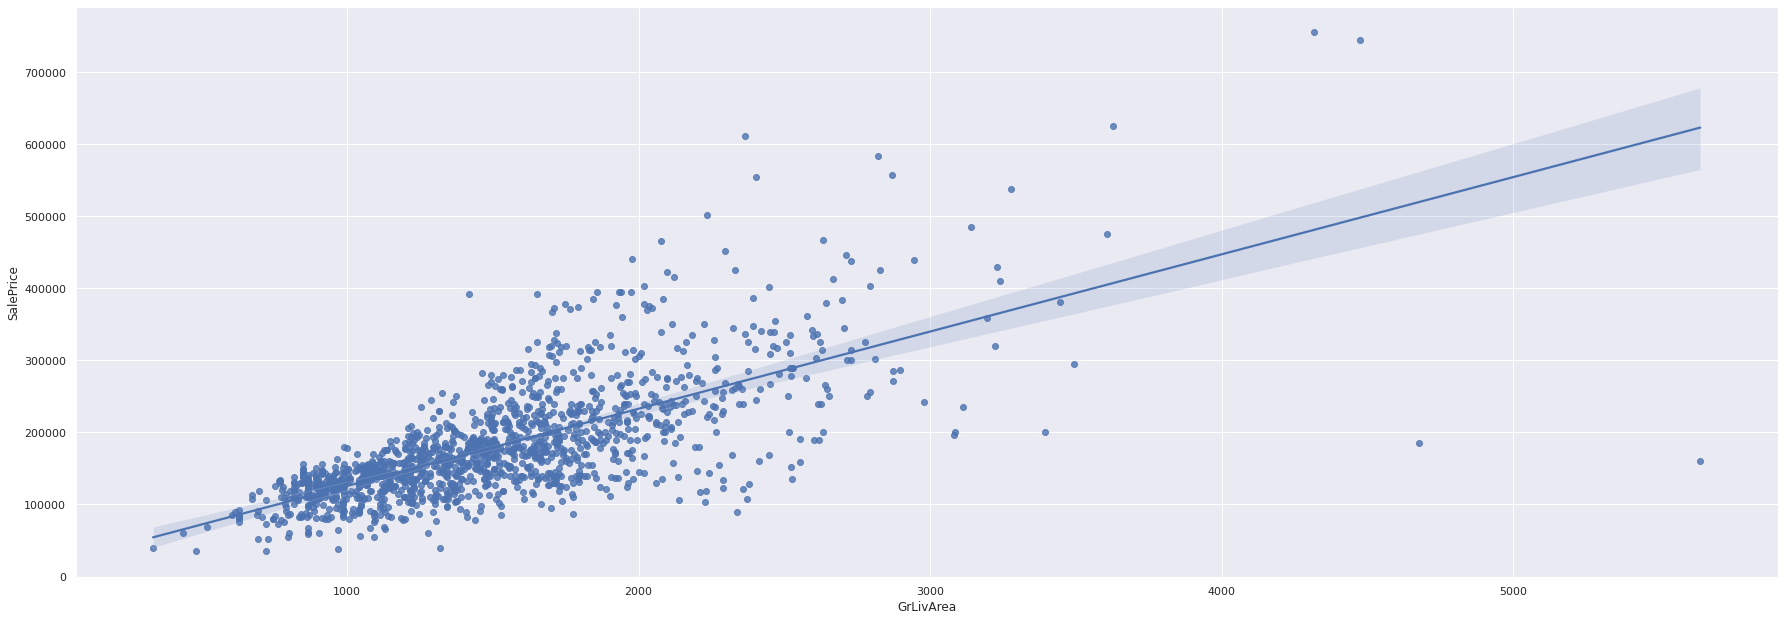

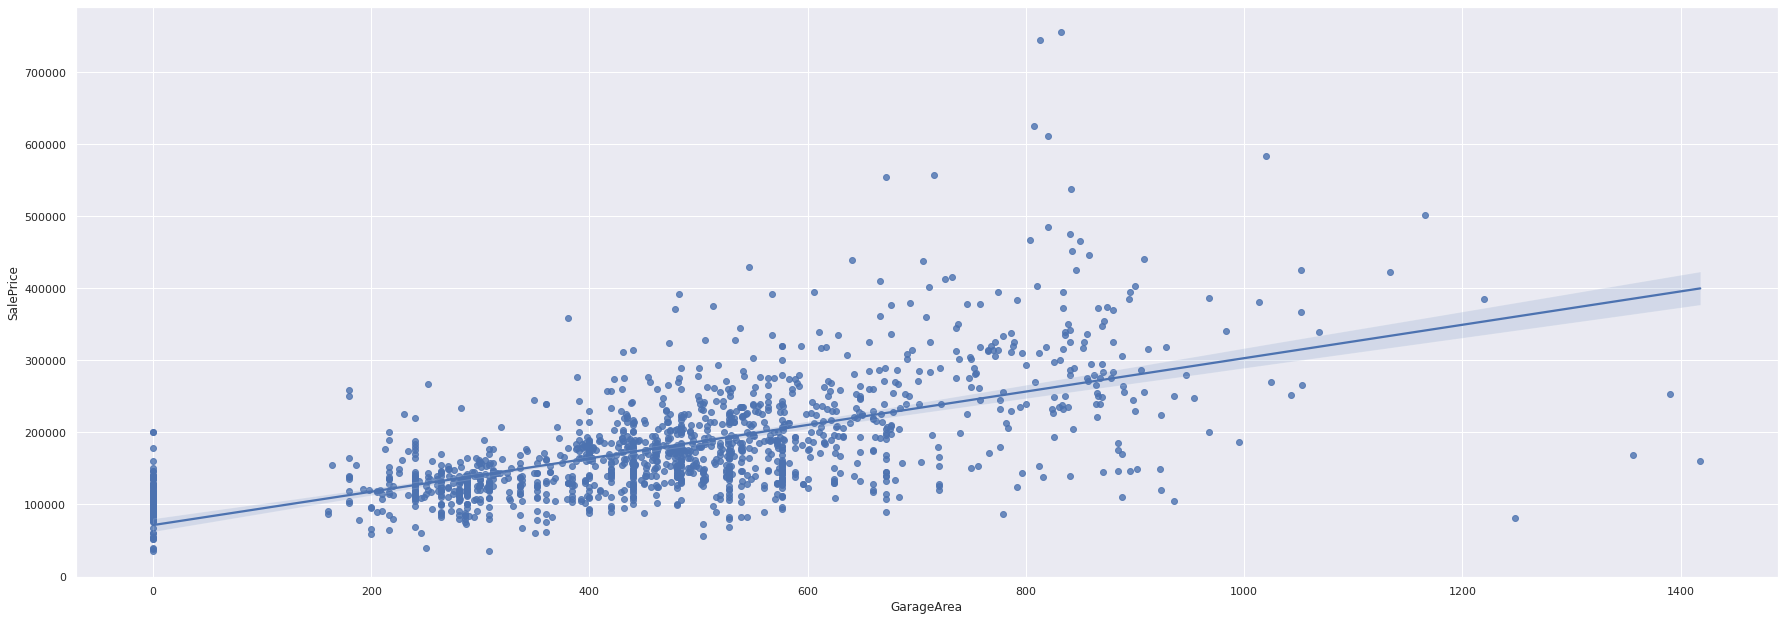

In [12]:
c_n_housing1 = X.columns.values.tolist()
unwanted_num=["SalePrice","GarageFinish","Condition2","Condition1","GarageQual","GarageCond","BsmtExposure",
              "Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Street","MSZoning",
              "SaleType","PavedDrive","GarageType","HouseStyle","Functional","BsmtFinType1","BsmtQual",
              "BsmtFinType2","Foundation","ExterCond","ExterQual","SaleCondition","HeatingQC","CentralAir",
              "Electrical","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","KitchenQual",
              "BsmtCond","BldgType","Heating","MSSubClass","OverallQual","OverallCond","BsmtFullBath",
              "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars",
              "MoSold","YrSold","TotRmsAbvGrd","YearRemodAdd","YearBuilt","GarageYrBlt"]
c_n_housing1 = [ele for ele in c_n_housing1 if ele not in unwanted_num]
print(c_n_housing1)
corrp = []

for i in c_n_housing1: 
    putt = X[i].corr(X['SalePrice'])
    
    if putt >= 0.5 or putt <-0.5:
        corrp = corrp + [i]
    else:
        continue
    print("The correlation between ", i ," and SalesPrice is = ", putt)
print(corrp)

for i in corrp:  # Loop over all columns except 'Location'
    sns.set()
    fig, ax = plt.subplots()
    fig.set_size_inches(30.5, 10.5)
    sns.regplot(x=i, y='SalePrice', data=X)  # column is chosen here
   

In [13]:

pearson_housing = ["GarageFinish","Condition2","Condition1","GarageQual","GarageCond","BsmtExposure",
        "Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Street","MSZoning",
        "SaleType","PavedDrive","GarageType","HouseStyle","Functional","BsmtFinType1","BsmtQual",
        "BsmtFinType2","Foundation","ExterCond","ExterQual","SaleCondition","HeatingQC","CentralAir",
        "Electrical","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","KitchenQual",
        "BsmtCond","BldgType","Heating","MSSubClass","OverallQual","OverallCond","BsmtFullBath",
        "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars",
        "MoSold","YrSold","TotRmsAbvGrd","YearRemodAdd","YearBuilt","GarageYrBlt"]
X2 = X[["SalePrice","GarageFinish","Condition2","Condition1","GarageQual","GarageCond","BsmtExposure",
        "Neighborhood","LandSlope","LotConfig","Utilities","LandContour","LotShape","Street","MSZoning",
        "SaleType","PavedDrive","GarageType","HouseStyle","Functional","BsmtFinType1","BsmtQual",
        "BsmtFinType2","Foundation","ExterCond","ExterQual","SaleCondition","HeatingQC","CentralAir",
        "Electrical","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","KitchenQual",
        "BsmtCond","BldgType","Heating","MSSubClass","OverallQual","OverallCond","BsmtFullBath",
        "BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars",
        "MoSold","YrSold","TotRmsAbvGrd","YearRemodAdd","YearBuilt","GarageYrBlt"]]
np.isnan(X2).any()

SalePrice        False
GarageFinish     False
Condition2       False
Condition1       False
GarageQual       False
GarageCond       False
BsmtExposure     False
Neighborhood     False
LandSlope        False
LotConfig        False
Utilities        False
LandContour      False
LotShape         False
Street           False
MSZoning         False
SaleType         False
PavedDrive       False
GarageType       False
HouseStyle       False
Functional       False
BsmtFinType1     False
BsmtQual         False
BsmtFinType2     False
Foundation       False
ExterCond        False
ExterQual        False
SaleCondition    False
HeatingQC        False
CentralAir       False
Electrical       False
MasVnrType       False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
RoofStyle        False
KitchenQual      False
BsmtCond         False
BldgType         False
Heating          False
MSSubClass       False
OverallQual      False
OverallCond      False
BsmtFullBath     False
BsmtHalfBat

In [14]:
X2['GarageYrBlt'].fillna(int((X2['GarageYrBlt'].mean())), inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
np.isnan(X2).any()

SalePrice        False
GarageFinish     False
Condition2       False
Condition1       False
GarageQual       False
GarageCond       False
BsmtExposure     False
Neighborhood     False
LandSlope        False
LotConfig        False
Utilities        False
LandContour      False
LotShape         False
Street           False
MSZoning         False
SaleType         False
PavedDrive       False
GarageType       False
HouseStyle       False
Functional       False
BsmtFinType1     False
BsmtQual         False
BsmtFinType2     False
Foundation       False
ExterCond        False
ExterQual        False
SaleCondition    False
HeatingQC        False
CentralAir       False
Electrical       False
MasVnrType       False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
RoofStyle        False
KitchenQual      False
BsmtCond         False
BldgType         False
Heating          False
MSSubClass       False
OverallQual      False
OverallCond      False
BsmtFullBath     False
BsmtHalfBat

In [16]:
pcarl = []
for i in pearson_housing: 
   pearson_coef, p_value = stats.pearsonr(X2[i],X2['SalePrice'])
   if p_value <= 0.001:
        pcarl = pcarl + [i]
   else:
        continue
   print("The P-value of " ,i ," is P =", p_value) 

print(pcarl)

The P-value of  GarageFinish  is P = 3.448137521356474e-30
The P-value of  Condition1  is P = 0.0004879176783954465
The P-value of  GarageQual  is P = 3.1645107015068274e-24
The P-value of  GarageCond  is P = 6.788286194007077e-27
The P-value of  BsmtExposure  is P = 9.967788255316718e-14
The P-value of  Neighborhood  is P = 3.906732804258554e-16
The P-value of  LotShape  is P = 3.320711818202238e-23
The P-value of  MSZoning  is P = 1.4013002757716125e-10
The P-value of  PavedDrive  is P = 3.41833974822374e-19
The P-value of  GarageType  is P = 4.9380729885063305e-18
The P-value of  HouseStyle  is P = 4.06428284944684e-12
The P-value of  Functional  is P = 9.978134702390179e-06
The P-value of  BsmtQual  is P = 8.662182640654226e-70
The P-value of  BsmtFinType2  is P = 5.28440976280076e-07
The P-value of  Foundation  is P = 4.579865873936533e-52
The P-value of  ExterCond  is P = 6.995963215338824e-06
The P-value of  ExterQual  is P = 6.4244677574169624e-167
The P-value of  SaleCondition

In [17]:
pr = pf(degree = 3, include_bias=False)
train_poly = pr.fit_transform(train[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']])
pr.get_feature_names_out(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'])
pd.DataFrame(train_poly,columns=['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea','TotalBsmtSF^2', 'TotalBsmtSF 1stFlrSF', 'TotalBsmtSF GrLivArea',
       'TotalBsmtSF GarageArea', '1stFlrSF^2', '1stFlrSF GrLivArea','1stFlrSF GarageArea', 'GrLivArea^2', 'GrLivArea GarageArea','GarageArea^2', 
       'TotalBsmtSF^3', 'TotalBsmtSF^2 1stFlrSF','TotalBsmtSF^2 GrLivArea', 'TotalBsmtSF^2 GarageArea','TotalBsmtSF 1stFlrSF^2', 
       'TotalBsmtSF 1stFlrSF GrLivArea','TotalBsmtSF 1stFlrSF GarageArea', 'TotalBsmtSF GrLivArea^2','TotalBsmtSF GrLivArea GarageArea', 
       'TotalBsmtSF GarageArea^2','1stFlrSF^3', '1stFlrSF^2 GrLivArea', '1stFlrSF^2 GarageArea','1stFlrSF GrLivArea^2', '1stFlrSF GrLivArea GarageArea',
       '1stFlrSF GarageArea^2', 'GrLivArea^3', 'GrLivArea^2 GarageArea','GrLivArea GarageArea^2', 'GarageArea^3'])

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,TotalBsmtSF^2,TotalBsmtSF 1stFlrSF,TotalBsmtSF GrLivArea,TotalBsmtSF GarageArea,1stFlrSF^2,1stFlrSF GrLivArea,...,1stFlrSF^3,1stFlrSF^2 GrLivArea,1stFlrSF^2 GarageArea,1stFlrSF GrLivArea^2,1stFlrSF GrLivArea GarageArea,1stFlrSF GarageArea^2,GrLivArea^3,GrLivArea^2 GarageArea,GrLivArea GarageArea^2,GarageArea^3
0,1214.0,1260.0,2291.0,506.0,1473796.0,1529640.0,2781274.0,614284.0,1587600.0,2886660.0,...,2.000376e+09,3.637192e+09,803325600.0,6.613338e+09,1.460650e+09,322605360.0,1.202473e+10,2.655833e+09,586578476.0,129554216.0
1,756.0,756.0,1469.0,216.0,571536.0,571536.0,1110564.0,163296.0,571536.0,1110564.0,...,4.320812e+08,8.395864e+08,123451776.0,1.631419e+09,2.398818e+08,35271936.0,3.170045e+09,4.661196e+08,68537664.0,10077696.0
2,907.0,1307.0,2358.0,360.0,822649.0,1185449.0,2138706.0,326520.0,1708249.0,3081906.0,...,2.232681e+09,4.028051e+09,614969640.0,7.267134e+09,1.109486e+09,169387200.0,1.311087e+10,2.001659e+09,305596800.0,46656000.0
3,1020.0,908.0,1928.0,440.0,1040400.0,926160.0,1966560.0,448800.0,824464.0,1750624.0,...,7.486133e+08,1.589567e+09,362764160.0,3.375203e+09,7.702746e+08,175788800.0,7.166731e+09,1.635561e+09,373260800.0,85184000.0
4,264.0,768.0,1432.0,360.0,69696.0,202752.0,378048.0,95040.0,589824.0,1099776.0,...,4.529848e+08,8.446280e+08,212336640.0,1.574879e+09,3.959194e+08,99532800.0,2.936494e+09,7.382246e+08,185587200.0,46656000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,684.0,938.0,2358.0,0.0,467856.0,641592.0,1612872.0,0.0,879844.0,2211804.0,...,8.252937e+08,2.074672e+09,0.0,5.215434e+09,0.000000e+00,0.0,1.311087e+10,0.000000e+00,0.0,0.0
1456,833.0,833.0,833.0,0.0,693889.0,693889.0,693889.0,0.0,693889.0,693889.0,...,5.780095e+08,5.780095e+08,0.0,5.780095e+08,0.000000e+00,0.0,5.780095e+08,0.000000e+00,0.0,0.0
1457,630.0,630.0,630.0,0.0,396900.0,396900.0,396900.0,0.0,396900.0,396900.0,...,2.500470e+08,2.500470e+08,0.0,2.500470e+08,0.000000e+00,0.0,2.500470e+08,0.000000e+00,0.0,0.0
1458,896.0,896.0,1792.0,0.0,802816.0,802816.0,1605632.0,0.0,802816.0,1605632.0,...,7.193231e+08,1.438646e+09,0.0,2.877293e+09,0.000000e+00,0.0,5.754585e+09,0.000000e+00,0.0,0.0


In [18]:
train_clean = train[pcarl + corrp]
train_clean[["TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea","TotalBsmtSF^2", "TotalBsmtSF 1stFlrSF", "TotalBsmtSF GrLivArea",
       "TotalBsmtSF GarageArea", "1stFlrSF^2", "1stFlrSF GrLivArea","1stFlrSF GarageArea", "GrLivArea^2", "GrLivArea GarageArea","GarageArea^2", 
       "TotalBsmtSF^3", "TotalBsmtSF^2 1stFlrSF","TotalBsmtSF^2 GrLivArea", "TotalBsmtSF^2 GarageArea","TotalBsmtSF 1stFlrSF^2", 
       "TotalBsmtSF 1stFlrSF GrLivArea","TotalBsmtSF 1stFlrSF GarageArea", "TotalBsmtSF GrLivArea^2","TotalBsmtSF GrLivArea GarageArea", 
       "TotalBsmtSF GarageArea^2","1stFlrSF^3", "1stFlrSF^2 GrLivArea", "1stFlrSF^2 GarageArea","1stFlrSF GrLivArea^2", 
       "1stFlrSF GrLivArea GarageArea","1stFlrSF GarageArea^2", "GrLivArea^3", "GrLivArea^2 GarageArea","GrLivArea GarageArea^2", 
       "GarageArea^3"]] = train_poly
train_clean.columns.sort_values()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Index(['1stFlrSF', '1stFlrSF GarageArea', '1stFlrSF GarageArea^2',
       '1stFlrSF GrLivArea', '1stFlrSF GrLivArea GarageArea',
       '1stFlrSF GrLivArea^2', '1stFlrSF^2', '1stFlrSF^2 GarageArea',
       '1stFlrSF^2 GrLivArea', '1stFlrSF^3', 'BedroomAbvGr', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFullBath', 'BsmtQual',
       'CentralAir', 'Condition1', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fireplaces', 'Foundation', 'FullBath',
       'Functional', 'GarageArea', 'GarageArea^2', 'GarageArea^3',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'GrLivArea GarageArea',
       'GrLivArea GarageArea^2', 'GrLivArea^2', 'GrLivArea^2 GarageArea',
       'GrLivArea^3', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LotShape', 'MSZoning', 'Neighborhood',
       'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition',
  

In [19]:
train_clean.dtypes

GarageFinish                         object
Condition1                           object
GarageQual                           object
GarageCond                           object
BsmtExposure                         object
Neighborhood                         object
LotShape                             object
MSZoning                             object
PavedDrive                           object
GarageType                           object
HouseStyle                           object
Functional                           object
BsmtQual                             object
BsmtFinType2                         object
Foundation                           object
ExterCond                            object
ExterQual                            object
SaleCondition                        object
HeatingQC                            object
CentralAir                           object
Electrical                           object
Exterior2nd                          object
Exterior1st                     

In [20]:
test_clean = test[pcarl + corrp]
test_clean

,GarageFinish,Condition1,GarageQual,GarageCond,BsmtExposure,Neighborhood,LotShape,MSZoning,PavedDrive,GarageType,...,Fireplaces,GarageCars,TotRmsAbvGrd,YearRemodAdd,YearBuilt,GarageYrBlt,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
0,Unf,Feedr,TA,TA,No,NAmes,Reg,RH,Y,Attchd,...,0,1.0,5,1961,1961,1961.0,882.0,896,896,730.0
1,Unf,Norm,TA,TA,No,NAmes,IR1,RL,Y,Attchd,...,0,1.0,6,1958,1958,1958.0,1329.0,1329,1329,312.0
2,Fin,Norm,TA,TA,No,Gilbert,IR1,RL,Y,Attchd,...,1,2.0,6,1998,1997,1997.0,928.0,928,1629,482.0
3,Fin,Norm,TA,TA,No,Gilbert,IR1,RL,Y,Attchd,...,1,2.0,7,1998,1998,1998.0,926.0,926,1604,470.0
4,RFn,Norm,TA,TA,No,StoneBr,IR1,RL,Y,Attchd,...,0,2.0,5,1992,1992,1992.0,1280.0,1280,1280,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,Norm,NaN,NaN,No,MeadowV,Reg,RM,Y,NaN,...,0,0.0,5,1970,1970,NaN,546.0,546,1092,0.0
1455,Unf,Norm,TA,TA,No,MeadowV,Reg,RM,Y,CarPort,...,0,1.0,6,1970,1970,1970.0,546.0,546,1092,286.0
1456,Unf,Norm,TA,TA,No,Mitchel,Reg,RL,Y,Detchd,...,1,2.0,7,1996,1960,1960.0,1224.0,1224,1224,576.0
1457,NaN,Norm,NaN,NaN,Av,Mitchel,Reg,RL,Y,NaN,...,0,0.0,6,1992,1992,NaN,912.0,970,970,0.0


In [21]:
testSQ = (test[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']])**2
testSQ.rename(columns = {'TotalBsmtSF':'TotalBsmtSFSq','1stFlrSF':'1stFlrSFSq','GrLivArea':'GrLivAreaSq','GarageArea':'GarageAreaSq'},inplace = True)
testSQ.columns
test_clean = test[pcarl + corrp]
test_clean[['TotalBsmtSFSq','1stFlrSFSq','GrLivAreaSq','GarageAreaSq']] = testSQ[['TotalBsmtSFSq','1stFlrSFSq','GrLivAreaSq','GarageAreaSq']]
test_clean

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,GarageFinish,Condition1,GarageQual,GarageCond,BsmtExposure,Neighborhood,LotShape,MSZoning,PavedDrive,GarageType,...,YearBuilt,GarageYrBlt,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,TotalBsmtSFSq,1stFlrSFSq,GrLivAreaSq,GarageAreaSq
0,Unf,Feedr,TA,TA,No,NAmes,Reg,RH,Y,Attchd,...,1961,1961.0,882.0,896,896,730.0,777924.0,802816,802816,532900.0
1,Unf,Norm,TA,TA,No,NAmes,IR1,RL,Y,Attchd,...,1958,1958.0,1329.0,1329,1329,312.0,1766241.0,1766241,1766241,97344.0
2,Fin,Norm,TA,TA,No,Gilbert,IR1,RL,Y,Attchd,...,1997,1997.0,928.0,928,1629,482.0,861184.0,861184,2653641,232324.0
3,Fin,Norm,TA,TA,No,Gilbert,IR1,RL,Y,Attchd,...,1998,1998.0,926.0,926,1604,470.0,857476.0,857476,2572816,220900.0
4,RFn,Norm,TA,TA,No,StoneBr,IR1,RL,Y,Attchd,...,1992,1992.0,1280.0,1280,1280,506.0,1638400.0,1638400,1638400,256036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,Norm,NaN,NaN,No,MeadowV,Reg,RM,Y,NaN,...,1970,NaN,546.0,546,1092,0.0,298116.0,298116,1192464,0.0
1455,Unf,Norm,TA,TA,No,MeadowV,Reg,RM,Y,CarPort,...,1970,1970.0,546.0,546,1092,286.0,298116.0,298116,1192464,81796.0
1456,Unf,Norm,TA,TA,No,Mitchel,Reg,RL,Y,Detchd,...,1960,1960.0,1224.0,1224,1224,576.0,1498176.0,1498176,1498176,331776.0
1457,NaN,Norm,NaN,NaN,Av,Mitchel,Reg,RL,Y,NaN,...,1992,NaN,912.0,970,970,0.0,831744.0,940900,940900,0.0


In [22]:
XX = train_clean
YY = train.SalePrice

In [23]:
XX.fillna(1, inplace=True)
XX["GarageYrBlt"] = XX["GarageYrBlt"].astype('int64')
XX

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,GarageFinish,Condition1,GarageQual,GarageCond,BsmtExposure,Neighborhood,LotShape,MSZoning,PavedDrive,GarageType,...,1stFlrSF^3,1stFlrSF^2 GrLivArea,1stFlrSF^2 GarageArea,1stFlrSF GrLivArea^2,1stFlrSF GrLivArea GarageArea,1stFlrSF GarageArea^2,GrLivArea^3,GrLivArea^2 GarageArea,GrLivArea GarageArea^2,GarageArea^3
0,Unf,Norm,TA,TA,Mn,OldTown,Reg,C (all),Y,Detchd,...,2.000376e+09,3.637192e+09,803325600.0,6.613338e+09,1.460650e+09,322605360.0,1.202473e+10,2.655833e+09,586578476.0,129554216.0
1,Unf,Norm,TA,TA,No,IDOTRR,Reg,RM,Y,Detchd,...,4.320812e+08,8.395864e+08,123451776.0,1.631419e+09,2.398818e+08,35271936.0,3.170045e+09,4.661196e+08,68537664.0,10077696.0
2,Unf,Norm,Fa,TA,No,ClearCr,IR2,RL,Y,Detchd,...,2.232681e+09,4.028051e+09,614969640.0,7.267134e+09,1.109486e+09,169387200.0,1.311087e+10,2.001659e+09,305596800.0,46656000.0
3,Unf,Norm,Po,Po,No,OldTown,Reg,RM,Y,Detchd,...,7.486133e+08,1.589567e+09,362764160.0,3.375203e+09,7.702746e+08,175788800.0,7.166731e+09,1.635561e+09,373260800.0,85184000.0
4,Unf,Norm,TA,Gd,No,OldTown,Reg,RM,Y,Detchd,...,4.529848e+08,8.446280e+08,212336640.0,1.574879e+09,3.959194e+08,99532800.0,2.936494e+09,7.382246e+08,185587200.0,46656000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,Norm,1,1,No,OldTown,Reg,RM,Y,1,...,8.252937e+08,2.074672e+09,0.0,5.215434e+09,0.000000e+00,0.0,1.311087e+10,0.000000e+00,0.0,0.0
1456,1,Norm,1,1,No,Mitchel,IR1,RL,Y,1,...,5.780095e+08,5.780095e+08,0.0,5.780095e+08,0.000000e+00,0.0,5.780095e+08,0.000000e+00,0.0,0.0
1457,1,Norm,1,1,Av,MeadowV,Reg,RM,Y,1,...,2.500470e+08,2.500470e+08,0.0,2.500470e+08,0.000000e+00,0.0,2.500470e+08,0.000000e+00,0.0,0.0
1458,1,Norm,1,1,No,NAmes,Reg,RL,Y,1,...,7.193231e+08,1.438646e+09,0.0,2.877293e+09,0.000000e+00,0.0,5.754585e+09,0.000000e+00,0.0,0.0


In [24]:
XX["GarageYrBlt"]

0       1900
1       1906
2       1908
3       1910
4       1910
        ... 
1455       1
1456       1
1457       1
1458       1
1459       1
Name: GarageYrBlt, Length: 1460, dtype: int64

In [25]:
XX.dtypes

GarageFinish                         object
Condition1                           object
GarageQual                           object
GarageCond                           object
BsmtExposure                         object
Neighborhood                         object
LotShape                             object
MSZoning                             object
PavedDrive                           object
GarageType                           object
HouseStyle                           object
Functional                           object
BsmtQual                             object
BsmtFinType2                         object
Foundation                           object
ExterCond                            object
ExterQual                            object
SaleCondition                        object
HeatingQC                            object
CentralAir                           object
Electrical                           object
Exterior2nd                          object
Exterior1st                     

In [26]:
cat_features1 = pcarl

In [54]:
params_list = []
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,YY,test_size=0.25,random_state=42)


Train_set=Pool(X_train, Y_train,cat_features=cat_features1)

Eval_set=Pool(X_test, Y_test,cat_features=cat_features1)
def objective(trial):
    global params_list
    param = {
        #'task_type':"GPU",
        'iterations':2000,
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.000001, 0.01),
        'use_best_model':True,
        #'od_type' : "Iter",
        #'od_wait' : 500,
        #'random_seed': 240,
        #"scale_pos_weight":trial.suggest_int("scale_pos_weight", 1, 10),
        "depth": trial.suggest_int("max_depth", 1, 10),
        "l2_leaf_reg": trial.suggest_loguniform("lambda",1,5),
          'eval_metric':trial.suggest_categorical("loss_function",['RMSE']),
         'one_hot_max_size':256
        }

    # Add a callback for pruning.
    model=CatBoostRegressor(**param)
    print(param)
    model.fit(Train_set,eval_set=Eval_set,plot=False,verbose=False)
    pred1 = model.predict(Pool(X_train,cat_features= cat_features1))
    pred2 = model.predict(Pool(X_test,cat_features= cat_features1))
    mape1 = (metrics.mean_absolute_percentage_error(pred1,Y_train))*100 
    mape2 = (metrics.mean_absolute_percentage_error(pred2,Y_test))*100
    variance = mape2-mape1
    print("The MAPE for train is", mape1)
    print("The MAPE for test is", mape2)
    print("The VARIANCE is ",variance)
   
    return mape2,variance

In [ ]:
if __name__ == "__main__":
    study = optuna.create_study(directions=["minimize", "minimize"])
    study.optimize(objective, n_trials=1000)
    trial_with_lowest_error = max(study.best_trials, key=lambda t: t.values[1])
    print(f"Trial_with_Lowest_error: ")
    print(f"\tnumber: {trial_with_lowest_error.number}")
    print(f"\tparams: {trial_with_lowest_error.params}")
    print(f"\tvalues: {trial_with_lowest_error.values}")
    trial_with_lowest_variance = max(study.best_trials, key=lambda t: t.values[0])
    print(f"Trial_with_Lowest_variance: ")
    print(f"\tnumber: {trial_with_lowest_variance.number}")
    print(f"\tparams: {trial_with_lowest_variance.params}")
    print(f"\tvalues: {trial_with_lowest_variance.values}")
    

[I 2022-08-10 08:40:36,342] A new study created in memory with name: no-name-9c2be978-173a-40c3-bfb7-bd4ff8660936


{'iterations': 2000, 'learning_rate': 0.000241354129568477, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.3901411524668363, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:40:43,565] Trial 0 finished with values: [22.66314256935323, 0.6973442911678127] and parameters: {'learning_rate': 0.000241354129568477, 'max_depth': 6, 'lambda': 2.3901411524668363, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.965798278185417
The MAPE for test is 22.66314256935323
The VARIANCE is  0.6973442911678127
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:40:45,395] Trial 1 finished with values: [17.079521994530495, 0.6524265061966545] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 2, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.42709548833384
The MAPE for test is 17.079521994530495
The VARIANCE is  0.6524265061966545
{'iterations': 2000, 'learning_rate': 2.5641605779976748e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0584097965063264, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:40:48,759] Trial 2 finished with values: [32.29750006437736, 0.9343104770081361] and parameters: {'learning_rate': 2.5641605779976748e-06, 'max_depth': 4, 'lambda': 2.0584097965063264, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.363189587369224
The MAPE for test is 32.29750006437736
The VARIANCE is  0.9343104770081361
{'iterations': 2000, 'learning_rate': 0.005135848942737997, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0415090778648186, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:40:56,086] Trial 3 finished with values: [9.59751396266844, 2.3517308716240803] and parameters: {'learning_rate': 0.005135848942737997, 'max_depth': 6, 'lambda': 2.0415090778648186, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.24578309104436
The MAPE for test is 9.59751396266844
The VARIANCE is  2.3517308716240803
{'iterations': 2000, 'learning_rate': 5.061816418668299e-05, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.22887976657963, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:41:31,760] Trial 4 finished with values: [29.83141629464222, 0.9492923513477187] and parameters: {'learning_rate': 5.061816418668299e-05, 'max_depth': 9, 'lambda': 2.22887976657963, 'loss_function': 'RMSE'}. 


The MAPE for train is 28.882123943294502
The MAPE for test is 29.83141629464222
The VARIANCE is  0.9492923513477187
{'iterations': 2000, 'learning_rate': 0.0009631289537057362, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.8504462616444182, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:07,063] Trial 5 finished with values: [12.866975463128973, 1.6616296342156787] and parameters: {'learning_rate': 0.0009631289537057362, 'max_depth': 9, 'lambda': 1.8504462616444182, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.205345828913295
The MAPE for test is 12.866975463128973
The VARIANCE is  1.6616296342156787
{'iterations': 2000, 'learning_rate': 0.00025007569815862807, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.3865456022322515, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:11,695] Trial 6 finished with values: [22.37605664019772, 0.6377695158079781] and parameters: {'learning_rate': 0.00025007569815862807, 'max_depth': 5, 'lambda': 1.3865456022322515, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.738287124389743
The MAPE for test is 22.37605664019772
The VARIANCE is  0.6377695158079781
{'iterations': 2000, 'learning_rate': 3.152213297919631e-05, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.1100420179486674, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:18,569] Trial 7 finished with values: [30.760026104754694, 0.9071150722381205] and parameters: {'learning_rate': 3.152213297919631e-05, 'max_depth': 6, 'lambda': 3.1100420179486674, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.852911032516573
The MAPE for test is 30.760026104754694
The VARIANCE is  0.9071150722381205
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:21,073] Trial 8 finished with values: [14.25955495028097, 0.8913748558143499] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.36818009446662
The MAPE for test is 14.25955495028097
The VARIANCE is  0.8913748558143499
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:23,646] Trial 9 finished with values: [11.302529293301331, 1.43599662348117] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 3, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.866532669820161
The MAPE for test is 11.302529293301331
The VARIANCE is  1.43599662348117
{'iterations': 2000, 'learning_rate': 0.00015755564689929583, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.597567105665575, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:27,045] Trial 10 finished with values: [25.516058831535958, 0.6854159324782749] and parameters: {'learning_rate': 0.00015755564689929583, 'max_depth': 4, 'lambda': 2.597567105665575, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.830642899057683
The MAPE for test is 25.516058831535958
The VARIANCE is  0.6854159324782749
{'iterations': 2000, 'learning_rate': 2.1606886224405543e-05, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 4.841946334555285, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:37,934] Trial 11 finished with values: [31.31717564973961, 0.9311783845298294] and parameters: {'learning_rate': 2.1606886224405543e-05, 'max_depth': 7, 'lambda': 4.841946334555285, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.38599726520978
The MAPE for test is 31.31717564973961
The VARIANCE is  0.9311783845298294
{'iterations': 2000, 'learning_rate': 0.009092566171826784, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:40,375] Trial 12 finished with values: [9.734307918077956, 2.1488392417658355] and parameters: {'learning_rate': 0.009092566171826784, 'max_depth': 3, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.585468676312121
The MAPE for test is 9.734307918077956
The VARIANCE is  2.1488392417658355
{'iterations': 2000, 'learning_rate': 1.1913214781701646e-06, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 3.603612325531061, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:42:51,230] Trial 13 finished with values: [32.37502893743924, 0.9379848633737282] and parameters: {'learning_rate': 1.1913214781701646e-06, 'max_depth': 7, 'lambda': 3.603612325531061, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.43704407406551
The MAPE for test is 32.37502893743924
The VARIANCE is  0.9379848633737282
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.0621967081621964, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:43:26,443] Trial 14 finished with values: [9.673179965782433, 3.8087622981000404] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 9, 'lambda': 1.0621967081621964, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.8644176676823925
The MAPE for test is 9.673179965782433
The VARIANCE is  3.8087622981000404
{'iterations': 2000, 'learning_rate': 1.4319380133933503e-05, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.2484253680603823, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:43:28,250] Trial 15 finished with values: [31.731385146972034, 0.8954255401972908] and parameters: {'learning_rate': 1.4319380133933503e-05, 'max_depth': 2, 'lambda': 1.2484253680603823, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.835959606774743
The MAPE for test is 31.731385146972034
The VARIANCE is  0.8954255401972908
{'iterations': 2000, 'learning_rate': 0.00011877396735326145, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.442559021069709, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:44:03,123] Trial 16 finished with values: [26.9199898000191, 0.9404120217299052] and parameters: {'learning_rate': 0.00011877396735326145, 'max_depth': 9, 'lambda': 2.442559021069709, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.979577778289194
The MAPE for test is 26.9199898000191
The VARIANCE is  0.9404120217299052
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:44:04,364] Trial 17 finished with values: [13.545848438291056, 1.3991690322522228] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.146679406038833
The MAPE for test is 13.545848438291056
The VARIANCE is  1.3991690322522228
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.0477017809049531, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:44:07,704] Trial 18 finished with values: [9.73396378477149, 1.9910372352851295] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.0477017809049531, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.74292654948636
The MAPE for test is 9.73396378477149
The VARIANCE is  1.9910372352851295
{'iterations': 2000, 'learning_rate': 0.002129393176127943, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.0096576242841346, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:45:06,818] Trial 19 finished with values: [10.497485673927464, 3.247987047679315] and parameters: {'learning_rate': 0.002129393176127943, 'max_depth': 10, 'lambda': 1.0096576242841346, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.249498626248149
The MAPE for test is 10.497485673927464
The VARIANCE is  3.247987047679315
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:45:17,886] Trial 20 finished with values: [20.99283200412846, 0.7771409529108197] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 7, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.21569105121764
The MAPE for test is 20.99283200412846
The VARIANCE is  0.7771409529108197
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.454760908475159, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:45:24,916] Trial 21 finished with values: [10.930214647579628, 1.644428574018244] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 6, 'lambda': 1.454760908475159, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.285786073561384
The MAPE for test is 10.930214647579628
The VARIANCE is  1.644428574018244
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 4.2012012561838326, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:45:31,893] Trial 22 finished with values: [12.819757257754297, 1.1837588782680104] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 4.2012012561838326, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.635998379486287
The MAPE for test is 12.819757257754297
The VARIANCE is  1.1837588782680104
{'iterations': 2000, 'learning_rate': 1.4200311465796547e-05, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:45:33,162] Trial 23 finished with values: [31.879237112627074, 0.8857335070188057] and parameters: {'learning_rate': 1.4200311465796547e-05, 'max_depth': 1, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.993503605608268
The MAPE for test is 31.879237112627074
The VARIANCE is  0.8857335070188057
{'iterations': 2000, 'learning_rate': 1.1659506184546743e-05, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.081790924722604, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:46:08,024] Trial 24 finished with values: [31.803429837828006, 0.9499352549299402] and parameters: {'learning_rate': 1.1659506184546743e-05, 'max_depth': 9, 'lambda': 2.081790924722604, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.853494582898065
The MAPE for test is 31.803429837828006
The VARIANCE is  0.9499352549299402
{'iterations': 2000, 'learning_rate': 0.000269004657691437, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.1368524717594244, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:46:14,987] Trial 25 finished with values: [21.718431454197702, 0.6821885915189867] and parameters: {'learning_rate': 0.000269004657691437, 'max_depth': 6, 'lambda': 1.1368524717594244, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.036242862678716
The MAPE for test is 21.718431454197702
The VARIANCE is  0.6821885915189867
{'iterations': 2000, 'learning_rate': 2.297810565996408e-06, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.4216659420144382, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:46:25,950] Trial 26 finished with values: [32.307858270262294, 0.9383261023825291] and parameters: {'learning_rate': 2.297810565996408e-06, 'max_depth': 7, 'lambda': 1.4216659420144382, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.369532167879765
The MAPE for test is 32.307858270262294
The VARIANCE is  0.9383261023825291
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:46:32,677] Trial 27 finished with values: [9.241010736697607, 2.8377388940164465] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.403271842681161
The MAPE for test is 9.241010736697607
The VARIANCE is  2.8377388940164465
{'iterations': 2000, 'learning_rate': 0.0001874578380623695, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.0347384025494208, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:46:43,650] Trial 28 finished with values: [24.109129034122194, 0.8238965211744969] and parameters: {'learning_rate': 0.0001874578380623695, 'max_depth': 7, 'lambda': 1.0347384025494208, 'loss_function': 'RMSE'}. 


The MAPE for train is 23.285232512947697
The MAPE for test is 24.109129034122194
The VARIANCE is  0.8238965211744969
{'iterations': 2000, 'learning_rate': 4.7858939749940586e-05, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.6825889984315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:46:54,651] Trial 29 finished with values: [29.883615158728205, 0.9081642968741512] and parameters: {'learning_rate': 4.7858939749940586e-05, 'max_depth': 7, 'lambda': 1.6825889984315, 'loss_function': 'RMSE'}. 


The MAPE for train is 28.975450861854053
The MAPE for test is 29.883615158728205
The VARIANCE is  0.9081642968741512
{'iterations': 2000, 'learning_rate': 3.405832012594765e-06, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.2758688604477855, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:47:14,067] Trial 30 finished with values: [32.243969877948295, 0.9403195919397191] and parameters: {'learning_rate': 3.405832012594765e-06, 'max_depth': 8, 'lambda': 1.2758688604477855, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.303650286008576
The MAPE for test is 32.243969877948295
The VARIANCE is  0.9403195919397191
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:48:13,505] Trial 31 finished with values: [9.424545385257806, 4.572577356623724] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 10, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.851968028634082
The MAPE for test is 9.424545385257806
The VARIANCE is  4.572577356623724
{'iterations': 2000, 'learning_rate': 2.123696707679681e-05, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.1337880154406528, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:49:12,030] Trial 32 finished with values: [31.35270640202344, 0.9608174246792629] and parameters: {'learning_rate': 2.123696707679681e-05, 'max_depth': 10, 'lambda': 3.1337880154406528, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.391888977344177
The MAPE for test is 31.35270640202344
The VARIANCE is  0.9608174246792629
{'iterations': 2000, 'learning_rate': 0.0006773678511302927, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.1419052308664916, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:49:13,829] Trial 33 finished with values: [17.194815938750878, 0.6445490698300276] and parameters: {'learning_rate': 0.0006773678511302927, 'max_depth': 2, 'lambda': 1.1419052308664916, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.55026686892085
The MAPE for test is 17.194815938750878
The VARIANCE is  0.6445490698300276
{'iterations': 2000, 'learning_rate': 6.780180239402613e-06, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 4.146854572491421, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:49:47,691] Trial 34 finished with values: [32.086918020615606, 0.9432558285907824] and parameters: {'learning_rate': 6.780180239402613e-06, 'max_depth': 9, 'lambda': 4.146854572491421, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.143662192024824
The MAPE for test is 32.086918020615606
The VARIANCE is  0.9432558285907824
{'iterations': 2000, 'learning_rate': 3.129306525939766e-05, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 2.3188637161784027, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:49:58,915] Trial 35 finished with values: [30.753219991594, 0.9244040424337996] and parameters: {'learning_rate': 3.129306525939766e-05, 'max_depth': 7, 'lambda': 2.3188637161784027, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.8288159491602
The MAPE for test is 30.753219991594
The VARIANCE is  0.9244040424337996
{'iterations': 2000, 'learning_rate': 2.5651681969114225e-06, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.984934436347744, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:00,071] Trial 36 finished with values: [32.336992031185346, 0.92834084720268] and parameters: {'learning_rate': 2.5651681969114225e-06, 'max_depth': 1, 'lambda': 2.984934436347744, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.408651183982666
The MAPE for test is 32.336992031185346
The VARIANCE is  0.92834084720268
{'iterations': 2000, 'learning_rate': 9.46363831683139e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.523088145825197, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:04,123] Trial 37 finished with values: [27.916996771085927, 0.7641968434116286] and parameters: {'learning_rate': 9.46363831683139e-05, 'max_depth': 4, 'lambda': 3.523088145825197, 'loss_function': 'RMSE'}. 


The MAPE for train is 27.152799927674298
The MAPE for test is 27.916996771085927
The VARIANCE is  0.7641968434116286
{'iterations': 2000, 'learning_rate': 3.802178481883428e-05, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.4108847627046555, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:15,077] Trial 38 finished with values: [30.36433408552525, 0.9181832299341544] and parameters: {'learning_rate': 3.802178481883428e-05, 'max_depth': 7, 'lambda': 1.4108847627046555, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.446150855591096
The MAPE for test is 30.36433408552525
The VARIANCE is  0.9181832299341544
{'iterations': 2000, 'learning_rate': 0.00018442362533685323, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:16,843] Trial 39 finished with values: [25.388216918677536, 0.5105975322137084] and parameters: {'learning_rate': 0.00018442362533685323, 'max_depth': 2, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.877619386463827
The MAPE for test is 25.388216918677536
The VARIANCE is  0.5105975322137084
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:20,174] Trial 40 finished with values: [13.405356702121669, 1.0375026102650864] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.367854091856582
The MAPE for test is 13.405356702121669
The VARIANCE is  1.0375026102650864
{'iterations': 2000, 'learning_rate': 1.0806476127379229e-05, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.8673212303251332, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:22,805] Trial 41 finished with values: [31.86452660520479, 0.9149219693178487] and parameters: {'learning_rate': 1.0806476127379229e-05, 'max_depth': 3, 'lambda': 1.8673212303251332, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.949604635886942
The MAPE for test is 31.86452660520479
The VARIANCE is  0.9149219693178487
{'iterations': 2000, 'learning_rate': 0.0007986408363874511, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.2177252012124917, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:27,563] Trial 42 finished with values: [14.313369831434061, 0.9324213764884703] and parameters: {'learning_rate': 0.0007986408363874511, 'max_depth': 5, 'lambda': 2.2177252012124917, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.38094845494559
The MAPE for test is 14.313369831434061
The VARIANCE is  0.9324213764884703
{'iterations': 2000, 'learning_rate': 0.00027260843566605605, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.019028407773446, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:50:32,284] Trial 43 finished with values: [22.024178432009894, 0.6163562116356402] and parameters: {'learning_rate': 0.00027260843566605605, 'max_depth': 5, 'lambda': 4.019028407773446, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.407822220374253
The MAPE for test is 22.024178432009894
The VARIANCE is  0.6163562116356402
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:51:31,327] Trial 44 finished with values: [16.34430027279089, 1.2845003425205874] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 10, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.059799930270302
The MAPE for test is 16.34430027279089
The VARIANCE is  1.2845003425205874
{'iterations': 2000, 'learning_rate': 0.00017633296885839902, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.8552441879052757, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:51:38,243] Trial 45 finished with values: [24.631455313702702, 0.7585159066836873] and parameters: {'learning_rate': 0.00017633296885839902, 'max_depth': 6, 'lambda': 1.8552441879052757, 'loss_function': 'RMSE'}. 


The MAPE for train is 23.872939407019015
The MAPE for test is 24.631455313702702
The VARIANCE is  0.7585159066836873
{'iterations': 2000, 'learning_rate': 3.4443113823641664e-06, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.514574886018005, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:51:42,923] Trial 46 finished with values: [32.243896073905084, 0.9345214752054822] and parameters: {'learning_rate': 3.4443113823641664e-06, 'max_depth': 5, 'lambda': 1.514574886018005, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.309374598699602
The MAPE for test is 32.243896073905084
The VARIANCE is  0.9345214752054822
{'iterations': 2000, 'learning_rate': 3.528050546134497e-05, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 4.672268435762475, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:52:41,894] Trial 47 finished with values: [30.732513874117906, 0.9608395503786546] and parameters: {'learning_rate': 3.528050546134497e-05, 'max_depth': 10, 'lambda': 4.672268435762475, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.77167432373925
The MAPE for test is 30.732513874117906
The VARIANCE is  0.9608395503786546
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.7817074395863095, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:53:42,877] Trial 48 finished with values: [18.32330284904388, 1.0681997299057606] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 10, 'lambda': 3.7817074395863095, 'loss_function': 'RMSE'}. 


The MAPE for train is 17.25510311913812
The MAPE for test is 18.32330284904388
The VARIANCE is  1.0681997299057606
{'iterations': 2000, 'learning_rate': 6.660455647857419e-06, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.9923709399453888, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:53:47,598] Trial 49 finished with values: [32.06563651669935, 0.9310954779630478] and parameters: {'learning_rate': 6.660455647857419e-06, 'max_depth': 5, 'lambda': 1.9923709399453888, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.1345410387363
The MAPE for test is 32.06563651669935
The VARIANCE is  0.9310954779630478
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.1419052308664916, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:53:58,910] Trial 50 finished with values: [20.99674153919828, 0.7742579394740581] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 7, 'lambda': 1.1419052308664916, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.22248359972422
The MAPE for test is 20.99674153919828
The VARIANCE is  0.7742579394740581
{'iterations': 2000, 'learning_rate': 0.00027260843566605605, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.984934436347744, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:54:00,056] Trial 51 finished with values: [24.959880722094606, 0.32377559298987535] and parameters: {'learning_rate': 0.00027260843566605605, 'max_depth': 1, 'lambda': 2.984934436347744, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.63610512910473
The MAPE for test is 24.959880722094606
The VARIANCE is  0.32377559298987535
{'iterations': 2000, 'learning_rate': 4.769929976596568e-06, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.3865456022322515, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:54:08,177] Trial 52 finished with values: [32.166627066999844, 0.9358870843650529] and parameters: {'learning_rate': 4.769929976596568e-06, 'max_depth': 6, 'lambda': 1.3865456022322515, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.23073998263479
The MAPE for test is 32.166627066999844
The VARIANCE is  0.9358870843650529
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.811700320416545, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:55:08,742] Trial 53 finished with values: [17.774598285700623, 1.1653533072393785] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 10, 'lambda': 1.811700320416545, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.609244978461245
The MAPE for test is 17.774598285700623
The VARIANCE is  1.1653533072393785
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:55:15,599] Trial 54 finished with values: [9.241010736697607, 2.8377388940164465] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.403271842681161
The MAPE for test is 9.241010736697607
The VARIANCE is  2.8377388940164465
{'iterations': 2000, 'learning_rate': 2.5641605779976748e-06, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.0415090778648186, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:56:16,273] Trial 55 finished with values: [32.3005030435601, 0.9425145724723869] and parameters: {'learning_rate': 2.5641605779976748e-06, 'max_depth': 10, 'lambda': 2.0415090778648186, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.35798847108771
The MAPE for test is 32.3005030435601
The VARIANCE is  0.9425145724723869
{'iterations': 2000, 'learning_rate': 2.2953701172765003e-06, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.7817074395863095, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:57:16,230] Trial 56 finished with values: [32.3215399883907, 0.9408499577271314] and parameters: {'learning_rate': 2.2953701172765003e-06, 'max_depth': 10, 'lambda': 3.7817074395863095, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.380690030663565
The MAPE for test is 32.3215399883907
The VARIANCE is  0.9408499577271314
{'iterations': 2000, 'learning_rate': 0.00012470145512145402, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0584097965063264, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:57:23,538] Trial 57 finished with values: [26.525385869838075, 0.7891251788338884] and parameters: {'learning_rate': 0.00012470145512145402, 'max_depth': 6, 'lambda': 2.0584097965063264, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.736260691004187
The MAPE for test is 26.525385869838075
The VARIANCE is  0.7891251788338884
{'iterations': 2000, 'learning_rate': 2.030506141598472e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.95893293180415, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:57:26,840] Trial 58 finished with values: [31.364440797653938, 0.9052765441900661] and parameters: {'learning_rate': 2.030506141598472e-05, 'max_depth': 4, 'lambda': 3.95893293180415, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.45916425346387
The MAPE for test is 31.364440797653938
The VARIANCE is  0.9052765441900661
{'iterations': 2000, 'learning_rate': 5.061816418668299e-05, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.22887976657963, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:01,515] Trial 59 finished with values: [29.83141629464222, 0.9492923513477187] and parameters: {'learning_rate': 5.061816418668299e-05, 'max_depth': 9, 'lambda': 2.22887976657963, 'loss_function': 'RMSE'}. 


The MAPE for train is 28.882123943294502
The MAPE for test is 29.83141629464222
The VARIANCE is  0.9492923513477187
{'iterations': 2000, 'learning_rate': 0.00018442362533685323, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 4.0925774135863, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:03,945] Trial 60 finished with values: [25.43416031784082, 0.5103643522716901] and parameters: {'learning_rate': 0.00018442362533685323, 'max_depth': 2, 'lambda': 4.0925774135863, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.92379596556913
The MAPE for test is 25.43416031784082
The VARIANCE is  0.5103643522716901
{'iterations': 2000, 'learning_rate': 0.00015908897443961097, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.984934436347744, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:06,535] Trial 61 finished with values: [25.703369486250203, 0.6305775475261157] and parameters: {'learning_rate': 0.00015908897443961097, 'max_depth': 3, 'lambda': 2.984934436347744, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.072791938724087
The MAPE for test is 25.703369486250203
The VARIANCE is  0.6305775475261157
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.0911588133442172, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:11,125] Trial 62 finished with values: [9.945099369454715, 2.04412123191884] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 5, 'lambda': 1.0911588133442172, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.9009781375358745
The MAPE for test is 9.945099369454715
The VARIANCE is  2.04412123191884
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:13,555] Trial 63 finished with values: [9.772113001380582, 2.0474722307661324] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.7246407706144495
The MAPE for test is 9.772113001380582
The VARIANCE is  2.0474722307661324
{'iterations': 2000, 'learning_rate': 0.00017633296885839902, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.8552441879052757, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:20,714] Trial 64 finished with values: [24.631455313702702, 0.7585159066836873] and parameters: {'learning_rate': 0.00017633296885839902, 'max_depth': 6, 'lambda': 1.8552441879052757, 'loss_function': 'RMSE'}. 


The MAPE for train is 23.872939407019015
The MAPE for test is 24.631455313702702
The VARIANCE is  0.7585159066836873
{'iterations': 2000, 'learning_rate': 3.4443113823641664e-06, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:21,894] Trial 65 finished with values: [32.30082375034962, 0.9249883306700468] and parameters: {'learning_rate': 3.4443113823641664e-06, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.375835419679575
The MAPE for test is 32.30082375034962
The VARIANCE is  0.9249883306700468
{'iterations': 2000, 'learning_rate': 2.1606886224405543e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.1368524717594244, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:25,305] Trial 66 finished with values: [31.260110525340878, 0.9011260833846606] and parameters: {'learning_rate': 2.1606886224405543e-05, 'max_depth': 4, 'lambda': 1.1368524717594244, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.358984441956217
The MAPE for test is 31.260110525340878
The VARIANCE is  0.9011260833846606
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.0621967081621964, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:58:30,063] Trial 67 finished with values: [9.945747432560005, 2.0351665832518275] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 5, 'lambda': 1.0621967081621964, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.910580849308177
The MAPE for test is 9.945747432560005
The VARIANCE is  2.0351665832518275
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.8175600620268715, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 08:59:30,211] Trial 68 finished with values: [18.062590682480938, 1.1053192241038516] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 10, 'lambda': 2.8175600620268715, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.957271458377086
The MAPE for test is 18.062590682480938
The VARIANCE is  1.1053192241038516
{'iterations': 2000, 'learning_rate': 0.00011877396735326145, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:00:05,974] Trial 69 finished with values: [26.712320926734762, 0.9544763832421097] and parameters: {'learning_rate': 0.00011877396735326145, 'max_depth': 9, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.757844543492652
The MAPE for test is 26.712320926734762
The VARIANCE is  0.9544763832421097
{'iterations': 2000, 'learning_rate': 0.00017276666695134927, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.4019109097664315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:00:41,132] Trial 70 finished with values: [24.931856113742597, 0.914385061458642] and parameters: {'learning_rate': 0.00017276666695134927, 'max_depth': 9, 'lambda': 2.4019109097664315, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.017471052283955
The MAPE for test is 24.931856113742597
The VARIANCE is  0.914385061458642
{'iterations': 2000, 'learning_rate': 4.7858939749940586e-05, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.1368524717594244, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:00:52,440] Trial 71 finished with values: [29.84580244282543, 0.908684560563195] and parameters: {'learning_rate': 4.7858939749940586e-05, 'max_depth': 7, 'lambda': 1.1368524717594244, 'loss_function': 'RMSE'}. 


The MAPE for train is 28.937117882262235
The MAPE for test is 29.84580244282543
The VARIANCE is  0.908684560563195
{'iterations': 2000, 'learning_rate': 3.4443113823641664e-06, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.514574886018005, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:00:57,455] Trial 72 finished with values: [32.243896073905084, 0.9345214752054822] and parameters: {'learning_rate': 3.4443113823641664e-06, 'max_depth': 5, 'lambda': 1.514574886018005, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.309374598699602
The MAPE for test is 32.243896073905084
The VARIANCE is  0.9345214752054822
{'iterations': 2000, 'learning_rate': 1.4319380133933503e-05, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.019028407773446, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:01:02,985] Trial 73 finished with values: [31.668606732877507, 0.922239992917433] and parameters: {'learning_rate': 1.4319380133933503e-05, 'max_depth': 5, 'lambda': 4.019028407773446, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.746366739960074
The MAPE for test is 31.668606732877507
The VARIANCE is  0.922239992917433
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:01:06,595] Trial 74 finished with values: [15.522725376414495, 0.7974928286645042] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.725232547749991
The MAPE for test is 15.522725376414495
The VARIANCE is  0.7974928286645042
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 4.800105600995499, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:02:06,698] Trial 75 finished with values: [16.933720617700452, 1.148422454102688] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 10, 'lambda': 4.800105600995499, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.785298163597764
The MAPE for test is 16.933720617700452
The VARIANCE is  1.148422454102688
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:02:09,345] Trial 76 finished with values: [12.077941804495518, 1.3940223930794708] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 3, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.683919411416047
The MAPE for test is 12.077941804495518
The VARIANCE is  1.3940223930794708
{'iterations': 2000, 'learning_rate': 3.129306525939766e-05, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.0096576242841346, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:03:09,854] Trial 77 finished with values: [30.729964186322924, 0.9839655627685886] and parameters: {'learning_rate': 3.129306525939766e-05, 'max_depth': 10, 'lambda': 1.0096576242841346, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.745998623554335
The MAPE for test is 30.729964186322924
The VARIANCE is  0.9839655627685886
{'iterations': 2000, 'learning_rate': 0.0006773678511302927, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.081790924722604, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:03:11,698] Trial 78 finished with values: [17.218325442330627, 0.645798564612317] and parameters: {'learning_rate': 0.0006773678511302927, 'max_depth': 2, 'lambda': 2.081790924722604, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.57252687771831
The MAPE for test is 17.218325442330627
The VARIANCE is  0.645798564612317
{'iterations': 2000, 'learning_rate': 6.660455647857419e-06, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.9923709399453888, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:03:46,647] Trial 79 finished with values: [32.072136698480655, 0.9456169508945536] and parameters: {'learning_rate': 6.660455647857419e-06, 'max_depth': 9, 'lambda': 1.9923709399453888, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.1265197475861
The MAPE for test is 32.072136698480655
The VARIANCE is  0.9456169508945536
{'iterations': 2000, 'learning_rate': 3.4041688517769045e-05, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 3.603612325531061, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:03:57,771] Trial 80 finished with values: [30.661688333210456, 0.920110250474508] and parameters: {'learning_rate': 3.4041688517769045e-05, 'max_depth': 7, 'lambda': 3.603612325531061, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.74157808273595
The MAPE for test is 30.661688333210456
The VARIANCE is  0.920110250474508
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.597567105665575, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:01,111] Trial 81 finished with values: [13.446853112907933, 1.0361023861978538] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 4, 'lambda': 2.597567105665575, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.410750726710079
The MAPE for test is 13.446853112907933
The VARIANCE is  1.0361023861978538
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:09,076] Trial 82 finished with values: [21.030203798242496, 0.6701055154413282] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 6, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.360098282801168
The MAPE for test is 21.030203798242496
The VARIANCE is  0.6701055154413282
{'iterations': 2000, 'learning_rate': 9.46363831683139e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.523088145825197, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:12,458] Trial 83 finished with values: [27.916996771085927, 0.7641968434116286] and parameters: {'learning_rate': 9.46363831683139e-05, 'max_depth': 4, 'lambda': 3.523088145825197, 'loss_function': 'RMSE'}. 


The MAPE for train is 27.152799927674298
The MAPE for test is 27.916996771085927
The VARIANCE is  0.7641968434116286
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:17,177] Trial 84 finished with values: [9.523354200620659, 2.347821988604327] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 5, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.175532212016332
The MAPE for test is 9.523354200620659
The VARIANCE is  2.347821988604327
{'iterations': 2000, 'learning_rate': 6.780180239402613e-06, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 4.146854572491421, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:24,433] Trial 85 finished with values: [32.07185620057509, 0.9341823847968236] and parameters: {'learning_rate': 6.780180239402613e-06, 'max_depth': 6, 'lambda': 4.146854572491421, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.137673815778268
The MAPE for test is 32.07185620057509
The VARIANCE is  0.9341823847968236
{'iterations': 2000, 'learning_rate': 1.9085888936288513e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.513114852802502, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:27,906] Trial 86 finished with values: [32.335579700735494, 0.9352161864493169] and parameters: {'learning_rate': 1.9085888936288513e-06, 'max_depth': 4, 'lambda': 3.513114852802502, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.400363514286177
The MAPE for test is 32.335579700735494
The VARIANCE is  0.9352161864493169
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:04:35,062] Trial 87 finished with values: [12.511668082988619, 1.3080125479043385] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.20365553508428
The MAPE for test is 12.511668082988619
The VARIANCE is  1.3080125479043385
{'iterations': 2000, 'learning_rate': 1.1659506184546743e-05, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 4.672268435762475, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:05:10,852] Trial 88 finished with values: [31.846528857320187, 0.9470692054088765] and parameters: {'learning_rate': 1.1659506184546743e-05, 'max_depth': 9, 'lambda': 4.672268435762475, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.89945965191131
The MAPE for test is 31.846528857320187
The VARIANCE is  0.9470692054088765
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.6825889984315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:05:22,102] Trial 89 finished with values: [21.09064102203681, 0.7572974402578652] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 7, 'lambda': 1.6825889984315, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.333343581778944
The MAPE for test is 21.09064102203681
The VARIANCE is  0.7572974402578652
{'iterations': 2000, 'learning_rate': 0.0009631289537057362, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.8504462616444182, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:05:57,472] Trial 90 finished with values: [12.866975463128973, 1.6616296342156787] and parameters: {'learning_rate': 0.0009631289537057362, 'max_depth': 9, 'lambda': 1.8504462616444182, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.205345828913295
The MAPE for test is 12.866975463128973
The VARIANCE is  1.6616296342156787
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:05:58,727] Trial 91 finished with values: [17.092847219033562, 0.6064958174525863] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.486351401580976
The MAPE for test is 17.092847219033562
The VARIANCE is  0.6064958174525863
{'iterations': 2000, 'learning_rate': 0.0001103552057935104, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.934242703561942, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:06:02,959] Trial 92 finished with values: [27.269640775404152, 0.7450963107475488] and parameters: {'learning_rate': 0.0001103552057935104, 'max_depth': 4, 'lambda': 2.934242703561942, 'loss_function': 'RMSE'}. 


The MAPE for train is 26.524544464656604
The MAPE for test is 27.269640775404152
The VARIANCE is  0.7450963107475488
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.0347384025494208, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:06:04,192] Trial 93 finished with values: [13.546977110234332, 1.389882170013518] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 1, 'lambda': 1.0347384025494208, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.157094940220814
The MAPE for test is 13.546977110234332
The VARIANCE is  1.389882170013518
{'iterations': 2000, 'learning_rate': 0.00025007569815862807, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.089808416512979, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:06:09,149] Trial 94 finished with values: [22.341737884045052, 0.640349117450743] and parameters: {'learning_rate': 0.00025007569815862807, 'max_depth': 5, 'lambda': 1.089808416512979, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.70138876659431
The MAPE for test is 22.341737884045052
The VARIANCE is  0.640349117450743
{'iterations': 2000, 'learning_rate': 4.998925510267396e-05, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.1100420179486674, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:07:09,546] Trial 95 finished with values: [29.970430400570702, 0.9676404151272813] and parameters: {'learning_rate': 4.998925510267396e-05, 'max_depth': 10, 'lambda': 3.1100420179486674, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.00278998544342
The MAPE for test is 29.970430400570702
The VARIANCE is  0.9676404151272813
{'iterations': 2000, 'learning_rate': 5.014811958486953e-06, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.3050608542202382, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:07:12,178] Trial 96 finished with values: [32.168911769679056, 0.9269715988824068] and parameters: {'learning_rate': 5.014811958486953e-06, 'max_depth': 3, 'lambda': 1.3050608542202382, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.24194017079665
The MAPE for test is 32.168911769679056
The VARIANCE is  0.9269715988824068
{'iterations': 2000, 'learning_rate': 3.152213297919631e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.1100420179486674, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:07:15,593] Trial 97 finished with values: [30.780869856769836, 0.8811332786267485] and parameters: {'learning_rate': 3.152213297919631e-05, 'max_depth': 4, 'lambda': 3.1100420179486674, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.899736578143088
The MAPE for test is 30.780869856769836
The VARIANCE is  0.8811332786267485
{'iterations': 2000, 'learning_rate': 0.00018442362533685323, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 4.605900527378166, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:08:16,010] Trial 98 finished with values: [25.028478326891413, 0.9485739253822558] and parameters: {'learning_rate': 0.00018442362533685323, 'max_depth': 10, 'lambda': 4.605900527378166, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.079904401509157
The MAPE for test is 25.028478326891413
The VARIANCE is  0.9485739253822558
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:08:27,545] Trial 99 finished with values: [20.99283200412846, 0.7771409529108197] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 7, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.21569105121764
The MAPE for test is 20.99283200412846
The VARIANCE is  0.7771409529108197
{'iterations': 2000, 'learning_rate': 0.005347983745653731, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:08:30,106] Trial 100 finished with values: [10.389135838397143, 1.6559069610593404] and parameters: {'learning_rate': 0.005347983745653731, 'max_depth': 3, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.733228877337803
The MAPE for test is 10.389135838397143
The VARIANCE is  1.6559069610593404
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.7768468752384643, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:08:32,678] Trial 101 finished with values: [18.660115124822198, 0.5136167317336771] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 3, 'lambda': 2.7768468752384643, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.14649839308852
The MAPE for test is 18.660115124822198
The VARIANCE is  0.5136167317336771
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.3865456022322515, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:09:33,550] Trial 102 finished with values: [17.63526625852763, 1.227666886765146] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 10, 'lambda': 1.3865456022322515, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.407599371762483
The MAPE for test is 17.63526625852763
The VARIANCE is  1.227666886765146
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:09:38,226] Trial 103 finished with values: [9.174430807556789, 2.845382759167552] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 5, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.329048048389237
The MAPE for test is 9.174430807556789
The VARIANCE is  2.845382759167552
{'iterations': 2000, 'learning_rate': 1.5289758663657052e-05, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.811700320416545, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:10:39,171] Trial 104 finished with values: [31.616364261764325, 0.9610069373187144] and parameters: {'learning_rate': 1.5289758663657052e-05, 'max_depth': 10, 'lambda': 1.811700320416545, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.65535732444561
The MAPE for test is 31.616364261764325
The VARIANCE is  0.9610069373187144
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:10:43,921] Trial 105 finished with values: [10.53082624645861, 1.690764896061765] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 5, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.840061350396844
The MAPE for test is 10.53082624645861
The VARIANCE is  1.690764896061765
{'iterations': 2000, 'learning_rate': 0.001883438457811468, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.759066449591846, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:11:45,197] Trial 106 finished with values: [10.82811125738879, 2.789916639384785] and parameters: {'learning_rate': 0.001883438457811468, 'max_depth': 10, 'lambda': 1.759066449591846, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.038194618004004
The MAPE for test is 10.82811125738879
The VARIANCE is  2.789916639384785
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.597567105665575, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:12:46,322] Trial 107 finished with values: [18.01026239173888, 1.1152606763393216] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 10, 'lambda': 2.597567105665575, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.89500171539956
The MAPE for test is 18.01026239173888
The VARIANCE is  1.1152606763393216
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.113224122136555, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:13:47,549] Trial 108 finished with values: [10.858093481313597, 2.6850646020094917] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 10, 'lambda': 2.113224122136555, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.173028879304105
The MAPE for test is 10.858093481313597
The VARIANCE is  2.6850646020094917
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.8504462616444182, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:14:23,774] Trial 109 finished with values: [9.72614049562926, 3.3837540272448745] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 9, 'lambda': 1.8504462616444182, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.342386468384385
The MAPE for test is 9.72614049562926
The VARIANCE is  3.3837540272448745
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.811700320416545, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:14:58,992] Trial 110 finished with values: [17.673683704526844, 1.0432849337087902] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 9, 'lambda': 1.811700320416545, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.630398770818054
The MAPE for test is 17.673683704526844
The VARIANCE is  1.0432849337087902
{'iterations': 2000, 'learning_rate': 0.0009631289537057362, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.1789109104722477, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:15:35,032] Trial 111 finished with values: [12.6774549245155, 1.752635573720145] and parameters: {'learning_rate': 0.0009631289537057362, 'max_depth': 9, 'lambda': 1.1789109104722477, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.924819350795355
The MAPE for test is 12.6774549245155
The VARIANCE is  1.752635573720145
{'iterations': 2000, 'learning_rate': 0.00018442362533685323, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 4.0925774135863, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:15:36,905] Trial 112 finished with values: [25.43416031784082, 0.5103643522716901] and parameters: {'learning_rate': 0.00018442362533685323, 'max_depth': 2, 'lambda': 4.0925774135863, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.92379596556913
The MAPE for test is 25.43416031784082
The VARIANCE is  0.5103643522716901
{'iterations': 2000, 'learning_rate': 0.0009631289537057362, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.6825889984315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:16:13,143] Trial 113 finished with values: [12.803132067425505, 1.6598456395747299] and parameters: {'learning_rate': 0.0009631289537057362, 'max_depth': 9, 'lambda': 1.6825889984315, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.143286427850775
The MAPE for test is 12.803132067425505
The VARIANCE is  1.6598456395747299
{'iterations': 2000, 'learning_rate': 0.000241354129568477, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.204293990398087, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:16:20,150] Trial 114 finished with values: [22.64139630456239, 0.6985833874485543] and parameters: {'learning_rate': 0.000241354129568477, 'max_depth': 6, 'lambda': 2.204293990398087, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.942812917113837
The MAPE for test is 22.64139630456239
The VARIANCE is  0.6985833874485543
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:16:21,322] Trial 115 finished with values: [24.527442308710317, 0.305267582405655] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 1, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.22217472630466
The MAPE for test is 24.527442308710317
The VARIANCE is  0.305267582405655
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:17:22,342] Trial 116 finished with values: [10.302264370890466, 3.070684703693061] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 10, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.231579667197405
The MAPE for test is 10.302264370890466
The VARIANCE is  3.070684703693061
{'iterations': 2000, 'learning_rate': 6.286921194690035e-06, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 4.217051404032438, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:18:22,904] Trial 117 finished with values: [32.1206691332582, 0.945773458717337] and parameters: {'learning_rate': 6.286921194690035e-06, 'max_depth': 10, 'lambda': 4.217051404032438, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.17489567454086
The MAPE for test is 32.1206691332582
The VARIANCE is  0.945773458717337
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:18:58,120] Trial 118 finished with values: [9.65990633481704, 3.6389516311570524] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 9, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.020954703659987
The MAPE for test is 9.65990633481704
The VARIANCE is  3.6389516311570524
{'iterations': 2000, 'learning_rate': 9.345921426287947e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.153446852696048, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:19:02,474] Trial 119 finished with values: [31.931758668194586, 0.9246023284226403] and parameters: {'learning_rate': 9.345921426287947e-06, 'max_depth': 4, 'lambda': 3.153446852696048, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.007156339771946
The MAPE for test is 31.931758668194586
The VARIANCE is  0.9246023284226403
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:20:03,503] Trial 120 finished with values: [16.34430027279089, 1.2845003425205874] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 10, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.059799930270302
The MAPE for test is 16.34430027279089
The VARIANCE is  1.2845003425205874
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.1086232419385398, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:20:15,055] Trial 121 finished with values: [20.993125917417835, 0.7751908266716612] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 7, 'lambda': 1.1086232419385398, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.217935090746174
The MAPE for test is 20.993125917417835
The VARIANCE is  0.7751908266716612
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:20:19,970] Trial 122 finished with values: [16.41644513818961, 0.7553688252118889] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 5, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.66107631297772
The MAPE for test is 16.41644513818961
The VARIANCE is  0.7553688252118889
{'iterations': 2000, 'learning_rate': 0.00014381238785291642, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:21,349] Trial 123 finished with values: [26.0442760335591, 0.9926803514362668] and parameters: {'learning_rate': 0.00014381238785291642, 'max_depth': 10, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.051595682122834
The MAPE for test is 26.0442760335591
The VARIANCE is  0.9926803514362668
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 3.7817074395863095, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:41,165] Trial 124 finished with values: [18.021027042119826, 0.8574617351094602] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 8, 'lambda': 3.7817074395863095, 'loss_function': 'RMSE'}. 


The MAPE for train is 17.163565307010366
The MAPE for test is 18.021027042119826
The VARIANCE is  0.8574617351094602
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:44,711] Trial 125 finished with values: [13.357882344827344, 1.0575070053897804] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.300375339437563
The MAPE for test is 13.357882344827344
The VARIANCE is  1.0575070053897804
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:48,179] Trial 126 finished with values: [21.398700528467167, 0.5711615225449762] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.82753900592219
The MAPE for test is 21.398700528467167
The VARIANCE is  0.5711615225449762
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.0621967081621964, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:49,464] Trial 127 finished with values: [12.805191420228418, 1.5050537164949915] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 1, 'lambda': 1.0621967081621964, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.300137703733427
The MAPE for test is 12.805191420228418
The VARIANCE is  1.5050537164949915
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.6825889984315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:50,717] Trial 128 finished with values: [17.087831339675944, 0.6144709572987921] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 1.6825889984315, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.47336038237715
The MAPE for test is 17.087831339675944
The VARIANCE is  0.6144709572987921
{'iterations': 2000, 'learning_rate': 0.00025007569815862807, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.5962155207654913, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:21:55,750] Trial 129 finished with values: [22.403794958383443, 0.6390511010129103] and parameters: {'learning_rate': 0.00025007569815862807, 'max_depth': 5, 'lambda': 1.5962155207654913, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.764743857370533
The MAPE for test is 22.403794958383443
The VARIANCE is  0.6390511010129103
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:03,987] Trial 130 finished with values: [12.511668082988619, 1.3080125479043385] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.20365553508428
The MAPE for test is 12.511668082988619
The VARIANCE is  1.3080125479043385
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:07,507] Trial 131 finished with values: [9.858539574844585, 1.889905537258147] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.968634037586438
The MAPE for test is 9.858539574844585
The VARIANCE is  1.889905537258147
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:09,301] Trial 132 finished with values: [10.794630195139744, 1.6253811539021417] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 2, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.169249041237602
The MAPE for test is 10.794630195139744
The VARIANCE is  1.6253811539021417
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.3382529033068988, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:12,701] Trial 133 finished with values: [13.362984949928855, 1.0426002049016603] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 4, 'lambda': 1.3382529033068988, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.320384745027194
The MAPE for test is 13.362984949928855
The VARIANCE is  1.0426002049016603
{'iterations': 2000, 'learning_rate': 0.0006773678511302927, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:14,565] Trial 134 finished with values: [17.22292510558115, 0.6453895569662862] and parameters: {'learning_rate': 0.0006773678511302927, 'max_depth': 2, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.577535548614865
The MAPE for test is 17.22292510558115
The VARIANCE is  0.6453895569662862
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.3056951256321074, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:17,118] Trial 135 finished with values: [18.579193568850574, 0.5279427712608609] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 3, 'lambda': 1.3056951256321074, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.051250797589713
The MAPE for test is 18.579193568850574
The VARIANCE is  0.5279427712608609
{'iterations': 2000, 'learning_rate': 0.00036584123973748794, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:52,607] Trial 136 finished with values: [19.652982202874025, 0.9647677421101299] and parameters: {'learning_rate': 0.00036584123973748794, 'max_depth': 9, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.688214460763895
The MAPE for test is 19.652982202874025
The VARIANCE is  0.9647677421101299
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:22:53,907] Trial 137 finished with values: [14.517875479748572, 0.9715713736168059] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 1, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.546304106131766
The MAPE for test is 14.517875479748572
The VARIANCE is  0.9715713736168059
{'iterations': 2000, 'learning_rate': 0.005135848942737997, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.1419052308664916, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:00,859] Trial 138 finished with values: [9.476800681740421, 2.5491755925106796] and parameters: {'learning_rate': 0.005135848942737997, 'max_depth': 6, 'lambda': 1.1419052308664916, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.927625089229742
The MAPE for test is 9.476800681740421
The VARIANCE is  2.5491755925106796
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.7867213811092015, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:09,430] Trial 139 finished with values: [9.462918286918981, 2.5439516240804165] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 3.7867213811092015, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.918966662838565
The MAPE for test is 9.462918286918981
The VARIANCE is  2.5439516240804165
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.0911588133442172, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:14,166] Trial 140 finished with values: [10.428310547879702, 1.7570986740736085] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 5, 'lambda': 1.0911588133442172, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.671211873806094
The MAPE for test is 10.428310547879702
The VARIANCE is  1.7570986740736085
{'iterations': 2000, 'learning_rate': 0.000241354129568477, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:15,337] Trial 141 finished with values: [25.546560715359067, 0.341771768406673] and parameters: {'learning_rate': 0.000241354129568477, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.204788946952394
The MAPE for test is 25.546560715359067
The VARIANCE is  0.341771768406673
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.0621967081621964, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:20,000] Trial 142 finished with values: [9.945747432560005, 2.0351665832518275] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 5, 'lambda': 1.0621967081621964, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.910580849308177
The MAPE for test is 9.945747432560005
The VARIANCE is  2.0351665832518275
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:23,644] Trial 143 finished with values: [15.522725376414495, 0.7974928286645042] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.725232547749991
The MAPE for test is 15.522725376414495
The VARIANCE is  0.7974928286645042
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.0277721279633634, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:23:26,202] Trial 144 finished with values: [11.095485537352557, 1.4972740307930028] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 3, 'lambda': 1.0277721279633634, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.598211506559554
The MAPE for test is 11.095485537352557
The VARIANCE is  1.4972740307930028
{'iterations': 2000, 'learning_rate': 0.0010847625319845898, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:24:27,488] Trial 145 finished with values: [12.48981975815735, 1.9535779207914032] and parameters: {'learning_rate': 0.0010847625319845898, 'max_depth': 10, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.536241837365946
The MAPE for test is 12.48981975815735
The VARIANCE is  1.9535779207914032
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.0621967081621964, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:24:30,112] Trial 146 finished with values: [14.20535693743885, 0.9086659842905593] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 1.0621967081621964, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.29669095314829
The MAPE for test is 14.20535693743885
The VARIANCE is  0.9086659842905593
{'iterations': 2000, 'learning_rate': 3.4357556367209235e-06, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.081790924722604, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:24:32,015] Trial 147 finished with values: [32.26780397945354, 0.927715039510101] and parameters: {'learning_rate': 3.4357556367209235e-06, 'max_depth': 2, 'lambda': 2.081790924722604, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.34008893994344
The MAPE for test is 32.26780397945354
The VARIANCE is  0.927715039510101
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:24:34,475] Trial 148 finished with values: [9.931913415614266, 1.7642007200920116] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 3, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.167712695522255
The MAPE for test is 9.931913415614266
The VARIANCE is  1.7642007200920116
{'iterations': 2000, 'learning_rate': 0.00027260843566605605, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.9346087951082356, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:25:35,514] Trial 149 finished with values: [22.409321461611725, 0.9705740875652928] and parameters: {'learning_rate': 0.00027260843566605605, 'max_depth': 10, 'lambda': 3.9346087951082356, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.438747374046432
The MAPE for test is 22.409321461611725
The VARIANCE is  0.9705740875652928
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:25:38,119] Trial 150 finished with values: [16.092999256820843, 0.7831762666552731] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.30982299016557
The MAPE for test is 16.092999256820843
The VARIANCE is  0.7831762666552731
{'iterations': 2000, 'learning_rate': 2.698057658143769e-06, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.0911588133442172, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:25:57,827] Trial 151 finished with values: [32.28351239193066, 0.9398532649642064] and parameters: {'learning_rate': 2.698057658143769e-06, 'max_depth': 8, 'lambda': 1.0911588133442172, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.34365912696645
The MAPE for test is 32.28351239193066
The VARIANCE is  0.9398532649642064
{'iterations': 2000, 'learning_rate': 0.00018474135865277362, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:26:03,500] Trial 152 finished with values: [24.4957417909083, 0.7026655874069156] and parameters: {'learning_rate': 0.00018474135865277362, 'max_depth': 5, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 23.793076203501386
The MAPE for test is 24.4957417909083
The VARIANCE is  0.7026655874069156
{'iterations': 2000, 'learning_rate': 1.8224723990534252e-05, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:26:08,389] Trial 153 finished with values: [31.443061676489105, 0.9153354217428102] and parameters: {'learning_rate': 1.8224723990534252e-05, 'max_depth': 5, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.527726254746295
The MAPE for test is 31.443061676489105
The VARIANCE is  0.9153354217428102
{'iterations': 2000, 'learning_rate': 4.164730051312282e-06, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.0911588133442172, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:26:28,006] Trial 154 finished with values: [32.198891754585645, 0.9408289255270539] and parameters: {'learning_rate': 4.164730051312282e-06, 'max_depth': 8, 'lambda': 1.0911588133442172, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.25806282905859
The MAPE for test is 32.198891754585645
The VARIANCE is  0.9408289255270539
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:26:30,593] Trial 155 finished with values: [12.136567768218148, 1.3504770590691635] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 3, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.786090709148985
The MAPE for test is 12.136567768218148
The VARIANCE is  1.3504770590691635
{'iterations': 2000, 'learning_rate': 0.005135848942737997, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.0415090778648186, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:06,934] Trial 156 finished with values: [9.529339251746837, 3.7108157914428697] and parameters: {'learning_rate': 0.005135848942737997, 'max_depth': 9, 'lambda': 2.0415090778648186, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.818523460303967
The MAPE for test is 9.529339251746837
The VARIANCE is  3.7108157914428697
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:14,092] Trial 157 finished with values: [17.68447089132471, 0.7056084830697102] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 6, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.978862408255
The MAPE for test is 17.68447089132471
The VARIANCE is  0.7056084830697102
{'iterations': 2000, 'learning_rate': 0.00012683641643507147, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:16,647] Trial 158 finished with values: [26.81189113226622, 0.6695042668087225] and parameters: {'learning_rate': 0.00012683641643507147, 'max_depth': 3, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 26.142386865457496
The MAPE for test is 26.81189113226622
The VARIANCE is  0.6695042668087225
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.7723629479025957, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:19,268] Trial 159 finished with values: [18.652464469031287, 0.5119028639409571] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 3, 'lambda': 2.7723629479025957, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.14056160509033
The MAPE for test is 18.652464469031287
The VARIANCE is  0.5119028639409571
{'iterations': 2000, 'learning_rate': 0.005135848942737997, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:54,625] Trial 160 finished with values: [9.429505549633925, 4.0637919463523895] and parameters: {'learning_rate': 0.005135848942737997, 'max_depth': 9, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.365713603281535
The MAPE for test is 9.429505549633925
The VARIANCE is  4.0637919463523895
{'iterations': 2000, 'learning_rate': 0.0004594111609991366, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.2730869399482803, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:57,173] Trial 161 finished with values: [18.685248789985167, 0.5215202130829688] and parameters: {'learning_rate': 0.0004594111609991366, 'max_depth': 3, 'lambda': 1.2730869399482803, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.163728576902198
The MAPE for test is 18.685248789985167
The VARIANCE is  0.5215202130829688
{'iterations': 2000, 'learning_rate': 0.00018994831715305052, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:27:58,978] Trial 162 finished with values: [25.219258086067303, 0.5056582331008457] and parameters: {'learning_rate': 0.00018994831715305052, 'max_depth': 2, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.713599852966457
The MAPE for test is 25.219258086067303
The VARIANCE is  0.5056582331008457
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:00,711] Trial 163 finished with values: [9.420803369969294, 5.36566174063207] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 10, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.055141629337224
The MAPE for test is 9.420803369969294
The VARIANCE is  5.36566174063207
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.320782661590146, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:06,464] Trial 164 finished with values: [13.522599258013395, 1.0140580143257907] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 5, 'lambda': 4.320782661590146, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.508541243687604
The MAPE for test is 13.522599258013395
The VARIANCE is  1.0140580143257907
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:11,115] Trial 165 finished with values: [15.173951143971262, 0.8545611065402969] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.319390037430965
The MAPE for test is 15.173951143971262
The VARIANCE is  0.8545611065402969
{'iterations': 2000, 'learning_rate': 5.1354912634184076e-06, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:13,630] Trial 166 finished with values: [32.16209275019331, 0.9267294117918183] and parameters: {'learning_rate': 5.1354912634184076e-06, 'max_depth': 3, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.23536333840149
The MAPE for test is 32.16209275019331
The VARIANCE is  0.9267294117918183
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.0911588133442172, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:18,489] Trial 167 finished with values: [9.945099369454715, 2.04412123191884] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 5, 'lambda': 1.0911588133442172, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.9009781375358745
The MAPE for test is 9.945099369454715
The VARIANCE is  2.04412123191884
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:54,091] Trial 168 finished with values: [9.26380443944818, 4.656866830463803] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 9, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.606937608984377
The MAPE for test is 9.26380443944818
The VARIANCE is  4.656866830463803
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:29:58,829] Trial 169 finished with values: [10.487072806434409, 1.6992990513050579] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 5, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.78777375512935
The MAPE for test is 10.487072806434409
The VARIANCE is  1.6992990513050579
{'iterations': 2000, 'learning_rate': 0.0007410939655784643, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:30:01,272] Trial 170 finished with values: [15.632970917027286, 0.8259245857200028] and parameters: {'learning_rate': 0.0007410939655784643, 'max_depth': 3, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.807046331307284
The MAPE for test is 15.632970917027286
The VARIANCE is  0.8259245857200028
{'iterations': 2000, 'learning_rate': 9.517253080148422e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.0477017809049531, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:30:05,562] Trial 171 finished with values: [31.9092626920012, 0.9241048457250365] and parameters: {'learning_rate': 9.517253080148422e-06, 'max_depth': 4, 'lambda': 1.0477017809049531, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.985157846276163
The MAPE for test is 31.9092626920012
The VARIANCE is  0.9241048457250365
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.3382529033068988, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:30:09,054] Trial 172 finished with values: [16.633782649406232, 0.7273889152704367] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 4, 'lambda': 1.3382529033068988, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.906393734135795
The MAPE for test is 16.633782649406232
The VARIANCE is  0.7273889152704367
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.5686616101507362, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:31:10,041] Trial 173 finished with values: [12.706958695697693, 1.7940676853457038] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 10, 'lambda': 3.5686616101507362, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.91289101035199
The MAPE for test is 12.706958695697693
The VARIANCE is  1.7940676853457038
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:31:16,904] Trial 174 finished with values: [9.229143363284065, 2.7836868376229633] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.445456525661101
The MAPE for test is 9.229143363284065
The VARIANCE is  2.7836868376229633
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.050581405675434, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:31:18,685] Trial 175 finished with values: [10.722792346809388, 1.6693445563599276] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 2, 'lambda': 1.050581405675434, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.05344779044946
The MAPE for test is 10.722792346809388
The VARIANCE is  1.6693445563599276
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.223853465344531, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:31:19,916] Trial 176 finished with values: [14.52446321016062, 0.9724691072989007] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 1, 'lambda': 1.223853465344531, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.55199410286172
The MAPE for test is 14.52446321016062
The VARIANCE is  0.9724691072989007
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.6816298117046418, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:20,942] Trial 177 finished with values: [13.107548474275305, 1.7405580313254188] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 10, 'lambda': 2.6816298117046418, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.366990442949886
The MAPE for test is 13.107548474275305
The VARIANCE is  1.7405580313254188
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:25,775] Trial 178 finished with values: [9.523354200620659, 2.347821988604327] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 5, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.175532212016332
The MAPE for test is 9.523354200620659
The VARIANCE is  2.347821988604327
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.1160543197040496, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:32,934] Trial 179 finished with values: [9.395886154638045, 2.6430131933269427] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 3.1160543197040496, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.752872961311103
The MAPE for test is 9.395886154638045
The VARIANCE is  2.6430131933269427
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.6825889984315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:34,224] Trial 180 finished with values: [12.255030455832744, 1.6363940148933054] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 1, 'lambda': 1.6825889984315, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.618636440939438
The MAPE for test is 12.255030455832744
The VARIANCE is  1.6363940148933054
{'iterations': 2000, 'learning_rate': 1.3712510603089226e-05, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0415090778648186, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:41,232] Trial 181 finished with values: [31.675136277816456, 0.9291053598055434] and parameters: {'learning_rate': 1.3712510603089226e-05, 'max_depth': 6, 'lambda': 2.0415090778648186, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.746030918010913
The MAPE for test is 31.675136277816456
The VARIANCE is  0.9291053598055434
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:43,078] Trial 182 finished with values: [11.278070356709497, 1.488063927764756] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 2, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.790006428944741
The MAPE for test is 11.278070356709497
The VARIANCE is  1.488063927764756
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:45,578] Trial 183 finished with values: [10.02643102773815, 1.7916875771327962] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 3, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.234743450605354
The MAPE for test is 10.02643102773815
The VARIANCE is  1.7916875771327962
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:46,752] Trial 184 finished with values: [17.072140930641435, 0.6131309481517917] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.459009982489643
The MAPE for test is 17.072140930641435
The VARIANCE is  0.6131309481517917
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.529615332666271, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:51,294] Trial 185 finished with values: [10.582044536404476, 1.6497668613339265] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 5, 'lambda': 2.529615332666271, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.93227767507055
The MAPE for test is 10.582044536404476
The VARIANCE is  1.6497668613339265
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.6355815252500725, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:32:58,670] Trial 186 finished with values: [12.564837963956515, 1.2987566967321253] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.6355815252500725, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.26608126722439
The MAPE for test is 12.564837963956515
The VARIANCE is  1.2987566967321253
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.7867213811092015, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:06,430] Trial 187 finished with values: [9.462918286918981, 2.5439516240804165] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 3.7867213811092015, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.918966662838565
The MAPE for test is 9.462918286918981
The VARIANCE is  2.5439516240804165
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.6856742422826394, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:17,233] Trial 188 finished with values: [12.5880297815395, 1.3400030565996097] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 7, 'lambda': 1.6856742422826394, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.24802672493989
The MAPE for test is 12.5880297815395
The VARIANCE is  1.3400030565996097
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.806820424234211, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:21,850] Trial 189 finished with values: [9.80924159508238, 2.2095285068451798] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 5, 'lambda': 4.806820424234211, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.5997130882372
The MAPE for test is 9.80924159508238
The VARIANCE is  2.2095285068451798
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.5791295993151067, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:24,330] Trial 190 finished with values: [10.201886132824121, 1.6985909768326852] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 3, 'lambda': 1.5791295993151067, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.503295155991436
The MAPE for test is 10.201886132824121
The VARIANCE is  1.6985909768326852
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:27,845] Trial 191 finished with values: [15.469488493521602, 0.8214117062011468] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.648076787320456
The MAPE for test is 15.469488493521602
The VARIANCE is  0.8214117062011468
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:34,870] Trial 192 finished with values: [9.241010736697607, 2.8377388940164465] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.403271842681161
The MAPE for test is 9.241010736697607
The VARIANCE is  2.8377388940164465
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4279268857851735, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:37,348] Trial 193 finished with values: [9.615337432291618, 2.091129737309627] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 1.4279268857851735, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.524207694981991
The MAPE for test is 9.615337432291618
The VARIANCE is  2.091129737309627
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.7768468752384643, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:39,201] Trial 194 finished with values: [19.572043933509644, 0.4551992338103297] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 2, 'lambda': 2.7768468752384643, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.116844699699314
The MAPE for test is 19.572043933509644
The VARIANCE is  0.4551992338103297
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:41,743] Trial 195 finished with values: [11.20630658371074, 1.4596363517436632] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 3, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.746670231967077
The MAPE for test is 11.20630658371074
The VARIANCE is  1.4596363517436632
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:48,604] Trial 196 finished with values: [10.2059033762802, 1.9101175814817406] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 6, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.295785794798459
The MAPE for test is 10.2059033762802
The VARIANCE is  1.9101175814817406
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.454760908475159, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:33:55,678] Trial 197 finished with values: [9.39895887100584, 2.6349485204622773] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 6, 'lambda': 1.454760908475159, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.764010350543563
The MAPE for test is 9.39895887100584
The VARIANCE is  2.6349485204622773
{'iterations': 2000, 'learning_rate': 0.004150816310651106, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.0415090778648186, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:34:31,643] Trial 198 finished with values: [9.738261244078013, 3.296109148287747] and parameters: {'learning_rate': 0.004150816310651106, 'max_depth': 9, 'lambda': 2.0415090778648186, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.442152095790266
The MAPE for test is 9.738261244078013
The VARIANCE is  3.296109148287747
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:34:32,847] Trial 199 finished with values: [16.935593040142056, 0.6468147588924609] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 1, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.288778281249595
The MAPE for test is 16.935593040142056
The VARIANCE is  0.6468147588924609
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.529615332666271, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:33,217] Trial 200 finished with values: [16.373943437367863, 1.256035764696101] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 10, 'lambda': 2.529615332666271, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.117907672671762
The MAPE for test is 16.373943437367863
The VARIANCE is  1.256035764696101
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 4.1093096146419095, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:40,434] Trial 201 finished with values: [12.803935422223672, 1.1804039583090358] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 4.1093096146419095, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.623531463914636
The MAPE for test is 12.803935422223672
The VARIANCE is  1.1804039583090358
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.3382529033068988, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:47,666] Trial 202 finished with values: [12.530483238005758, 1.2967162225578992] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.3382529033068988, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.233767015447858
The MAPE for test is 12.530483238005758
The VARIANCE is  1.2967162225578992
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:50,118] Trial 203 finished with values: [14.19954352534931, 0.9137689140770817] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.285774611272227
The MAPE for test is 14.19954352534931
The VARIANCE is  0.9137689140770817
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:51,311] Trial 204 finished with values: [19.49850554474544, 0.31376291817635504] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 1, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.184742626569086
The MAPE for test is 19.49850554474544
The VARIANCE is  0.31376291817635504
{'iterations': 2000, 'learning_rate': 9.7797075409852e-05, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:54,014] Trial 205 finished with values: [27.884159593444103, 0.7137720280898954] and parameters: {'learning_rate': 9.7797075409852e-05, 'max_depth': 3, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 27.170387565354208
The MAPE for test is 27.884159593444103
The VARIANCE is  0.7137720280898954
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.4110507551334648, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:35:58,826] Trial 206 finished with values: [15.119976115091058, 0.8787530084551225] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.4110507551334648, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.241223106635935
The MAPE for test is 15.119976115091058
The VARIANCE is  0.8787530084551225
{'iterations': 2000, 'learning_rate': 3.1768531861378295e-06, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:36:10,781] Trial 207 finished with values: [32.26204041024497, 0.9381523562728269] and parameters: {'learning_rate': 3.1768531861378295e-06, 'max_depth': 7, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.323888053972144
The MAPE for test is 32.26204041024497
The VARIANCE is  0.9381523562728269
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.113058233790975, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:36:14,206] Trial 208 finished with values: [15.530446271190282, 0.7993090651328068] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 2.113058233790975, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.731137206057475
The MAPE for test is 15.530446271190282
The VARIANCE is  0.7993090651328068
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:36:21,144] Trial 209 finished with values: [9.424976278989968, 2.4652761420920024] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 6, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.959700136897966
The MAPE for test is 9.424976278989968
The VARIANCE is  2.4652761420920024
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:36:56,560] Trial 210 finished with values: [17.480893725749763, 1.1053037223664433] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 9, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.37559000338332
The MAPE for test is 17.480893725749763
The VARIANCE is  1.1053037223664433
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.3382529033068988, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:36:57,797] Trial 211 finished with values: [17.07929783102329, 0.6203064596979324] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 1.3382529033068988, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.458991371325357
The MAPE for test is 17.07929783102329
The VARIANCE is  0.6203064596979324
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:03,245] Trial 212 finished with values: [12.711013669197746, 1.189510101885455] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 5, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.52150356731229
The MAPE for test is 12.711013669197746
The VARIANCE is  1.189510101885455
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:08,079] Trial 213 finished with values: [15.173951143971262, 0.8545611065402969] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.319390037430965
The MAPE for test is 15.173951143971262
The VARIANCE is  0.8545611065402969
{'iterations': 2000, 'learning_rate': 1.3583378271232026e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.1532350798055149, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:11,547] Trial 214 finished with values: [31.689082960989406, 0.9169685012236535] and parameters: {'learning_rate': 1.3583378271232026e-05, 'max_depth': 4, 'lambda': 1.1532350798055149, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.772114459765753
The MAPE for test is 31.689082960989406
The VARIANCE is  0.9169685012236535
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.7867213811092015, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:18,541] Trial 215 finished with values: [12.785869386581531, 1.2042414554468426] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 3.7867213811092015, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.581627931134689
The MAPE for test is 12.785869386581531
The VARIANCE is  1.2042414554468426
{'iterations': 2000, 'learning_rate': 0.0002790951347779937, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 4.2012012561838326, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:19,773] Trial 216 finished with values: [24.864258623340334, 0.3198829476602114] and parameters: {'learning_rate': 0.0002790951347779937, 'max_depth': 1, 'lambda': 4.2012012561838326, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.544375675680122
The MAPE for test is 24.864258623340334
The VARIANCE is  0.3198829476602114
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.542385018071566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:26,739] Trial 217 finished with values: [9.224664789642931, 2.9221802802566064] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.542385018071566, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.302484509386325
The MAPE for test is 9.224664789642931
The VARIANCE is  2.9221802802566064
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:33,722] Trial 218 finished with values: [9.229143363284065, 2.7836868376229633] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.445456525661101
The MAPE for test is 9.229143363284065
The VARIANCE is  2.7836868376229633
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.0621967081621964, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:40,685] Trial 219 finished with values: [12.97092691583168, 1.189671053354207] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 6, 'lambda': 1.0621967081621964, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.781255862477472
The MAPE for test is 12.97092691583168
The VARIANCE is  1.189671053354207
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:44,058] Trial 220 finished with values: [9.858539574844585, 1.889905537258147] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.968634037586438
The MAPE for test is 9.858539574844585
The VARIANCE is  1.889905537258147
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:47,364] Trial 221 finished with values: [9.643977076209415, 2.066833858777054] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.577143217432361
The MAPE for test is 9.643977076209415
The VARIANCE is  2.066833858777054
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:49,938] Trial 222 finished with values: [12.077941804495518, 1.3940223930794708] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 3, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.683919411416047
The MAPE for test is 12.077941804495518
The VARIANCE is  1.3940223930794708
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.6355815252500725, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:37:57,215] Trial 223 finished with values: [12.564837963956515, 1.2987566967321253] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.6355815252500725, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.26608126722439
The MAPE for test is 12.564837963956515
The VARIANCE is  1.2987566967321253
{'iterations': 2000, 'learning_rate': 7.402547464189575e-06, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:04,873] Trial 224 finished with values: [32.0272998987164, 0.9343278618102815] and parameters: {'learning_rate': 7.402547464189575e-06, 'max_depth': 6, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.09297203690612
The MAPE for test is 32.0272998987164
The VARIANCE is  0.9343278618102815
{'iterations': 2000, 'learning_rate': 1.5954307216586677e-05, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 4.129218944023538, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:06,133] Trial 225 finished with values: [31.816502121341934, 0.8795915893916053] and parameters: {'learning_rate': 1.5954307216586677e-05, 'max_depth': 1, 'lambda': 4.129218944023538, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.93691053195033
The MAPE for test is 31.816502121341934
The VARIANCE is  0.8795915893916053
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:08,658] Trial 226 finished with values: [16.092999256820843, 0.7831762666552731] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.30982299016557
The MAPE for test is 16.092999256820843
The VARIANCE is  0.7831762666552731
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:11,116] Trial 227 finished with values: [10.008303642469263, 1.7878902592806192] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 3, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.220413383188644
The MAPE for test is 10.008303642469263
The VARIANCE is  1.7878902592806192
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:12,919] Trial 228 finished with values: [19.56186058535304, 0.459480399599439] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 2, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.1023801857536
The MAPE for test is 19.56186058535304
The VARIANCE is  0.459480399599439
{'iterations': 2000, 'learning_rate': 0.00024241350831553376, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:14,055] Trial 229 finished with values: [25.532065533861783, 0.34244749367182337] and parameters: {'learning_rate': 0.00024241350831553376, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.18961804018996
The MAPE for test is 25.532065533861783
The VARIANCE is  0.34244749367182337
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.271919646258303, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:16,503] Trial 230 finished with values: [14.33830525762605, 0.8883287953641865] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 4.271919646258303, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.449976462261864
The MAPE for test is 14.33830525762605
The VARIANCE is  0.8883287953641865
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:35,914] Trial 231 finished with values: [9.405000991888082, 3.4611165730944036] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 8, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.943884418793679
The MAPE for test is 9.405000991888082
The VARIANCE is  3.4611165730944036
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:39,270] Trial 232 finished with values: [9.774407372637214, 1.9491040535748443] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.825303319062369
The MAPE for test is 9.774407372637214
The VARIANCE is  1.9491040535748443
{'iterations': 2000, 'learning_rate': 0.004777885541796738, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.7867213811092015, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:46,321] Trial 233 finished with values: [10.005428739918372, 2.085585996723771] and parameters: {'learning_rate': 0.004777885541796738, 'max_depth': 6, 'lambda': 3.7867213811092015, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.919842743194601
The MAPE for test is 10.005428739918372
The VARIANCE is  2.085585996723771
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:38:49,684] Trial 234 finished with values: [15.487750115114146, 0.8171274835261642] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.670622631587982
The MAPE for test is 15.487750115114146
The VARIANCE is  0.8171274835261642
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 4.2012012561838326, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:39:10,216] Trial 235 finished with values: [12.66767400673725, 1.4220281883775847] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 8, 'lambda': 4.2012012561838326, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.245645818359666
The MAPE for test is 12.66767400673725
The VARIANCE is  1.4220281883775847
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:39:15,191] Trial 236 finished with values: [15.073633662482418, 0.8871441411554564] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.186489521326962
The MAPE for test is 15.073633662482418
The VARIANCE is  0.8871441411554564
{'iterations': 2000, 'learning_rate': 1.1171453633352059e-05, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.529615332666271, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:39:17,889] Trial 237 finished with values: [31.84845472561354, 0.9142950510774135] and parameters: {'learning_rate': 1.1171453633352059e-05, 'max_depth': 3, 'lambda': 2.529615332666271, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.934159674536126
The MAPE for test is 31.84845472561354
The VARIANCE is  0.9142950510774135
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:39:19,166] Trial 238 finished with values: [17.393747893454815, 0.5905449182820739] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.80320297517274
The MAPE for test is 17.393747893454815
The VARIANCE is  0.5905449182820739
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:39:26,486] Trial 239 finished with values: [14.994882199283529, 0.926123017466784] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 6, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.068759181816745
The MAPE for test is 14.994882199283529
The VARIANCE is  0.926123017466784
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 4.814664387429435, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:03,321] Trial 240 finished with values: [21.83511253874074, 0.8688519510085193] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 9, 'lambda': 4.814664387429435, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.966260587732222
The MAPE for test is 21.83511253874074
The VARIANCE is  0.8688519510085193
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.812486315490029, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:10,602] Trial 241 finished with values: [9.241010736697607, 2.8377388940164465] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.812486315490029, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.403271842681161
The MAPE for test is 9.241010736697607
The VARIANCE is  2.8377388940164465
{'iterations': 2000, 'learning_rate': 0.0004529006288657734, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:13,159] Trial 242 finished with values: [18.83742071886413, 0.5085285997163211] and parameters: {'learning_rate': 0.0004529006288657734, 'max_depth': 3, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.32889211914781
The MAPE for test is 18.83742071886413
The VARIANCE is  0.5085285997163211
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:15,673] Trial 243 finished with values: [9.931913415614266, 1.7642007200920116] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 3, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.167712695522255
The MAPE for test is 9.931913415614266
The VARIANCE is  1.7642007200920116
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:19,291] Trial 244 finished with values: [9.858539574844585, 1.889905537258147] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.968634037586438
The MAPE for test is 9.858539574844585
The VARIANCE is  1.889905537258147
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:21,877] Trial 245 finished with values: [9.931913415614266, 1.7642007200920116] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 3, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.167712695522255
The MAPE for test is 9.931913415614266
The VARIANCE is  1.7642007200920116
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 3.916466453754431, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:28,954] Trial 246 finished with values: [9.443200046607393, 2.507178749150948] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 3.916466453754431, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.936021297456445
The MAPE for test is 9.443200046607393
The VARIANCE is  2.507178749150948
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:31,578] Trial 247 finished with values: [9.772113001380582, 2.0474722307661324] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.7246407706144495
The MAPE for test is 9.772113001380582
The VARIANCE is  2.0474722307661324
{'iterations': 2000, 'learning_rate': 2.7919031983194584e-05, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:34,141] Trial 248 finished with values: [30.994196810268015, 0.870372446798644] and parameters: {'learning_rate': 2.7919031983194584e-05, 'max_depth': 3, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.12382436346937
The MAPE for test is 30.994196810268015
The VARIANCE is  0.870372446798644
{'iterations': 2000, 'learning_rate': 9.319845206928553e-06, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 3.7867213811092015, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:36,655] Trial 249 finished with values: [31.949936798114997, 0.9180401492429837] and parameters: {'learning_rate': 9.319845206928553e-06, 'max_depth': 3, 'lambda': 3.7867213811092015, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.031896648872014
The MAPE for test is 31.949936798114997
The VARIANCE is  0.9180401492429837
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.3118738108209307, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:41,470] Trial 250 finished with values: [15.31596329639669, 0.8582946908033655] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 3.3118738108209307, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.457668605593325
The MAPE for test is 15.31596329639669
The VARIANCE is  0.8582946908033655
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:45,087] Trial 251 finished with values: [16.684578993076638, 0.7185905372597059] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.965988455816932
The MAPE for test is 16.684578993076638
The VARIANCE is  0.7185905372597059
{'iterations': 2000, 'learning_rate': 0.002792683411714715, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:48,434] Trial 252 finished with values: [10.816899059185339, 1.5330109666544356] and parameters: {'learning_rate': 0.002792683411714715, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.283888092530903
The MAPE for test is 10.816899059185339
The VARIANCE is  1.5330109666544356
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.3291357075715449, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:51,759] Trial 253 finished with values: [9.749665827091494, 1.9577794435633606] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.3291357075715449, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.791886383528134
The MAPE for test is 9.749665827091494
The VARIANCE is  1.9577794435633606
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.741552881894921, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:53,040] Trial 254 finished with values: [20.60882005071619, 0.2335911507275874] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 1, 'lambda': 3.741552881894921, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.375228899988603
The MAPE for test is 20.60882005071619
The VARIANCE is  0.2335911507275874
{'iterations': 2000, 'learning_rate': 8.058958552001218e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:56,709] Trial 255 finished with values: [31.991939851568464, 0.9261669412398668] and parameters: {'learning_rate': 8.058958552001218e-06, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.065772910328597
The MAPE for test is 31.991939851568464
The VARIANCE is  0.9261669412398668
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.2640208765713628, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:40:59,270] Trial 256 finished with values: [11.146933439907153, 1.5173516201799746] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 3, 'lambda': 1.2640208765713628, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.629581819727179
The MAPE for test is 11.146933439907153
The VARIANCE is  1.5173516201799746
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:41:07,099] Trial 257 finished with values: [9.511569214163243, 2.4104545367045587] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 6, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.101114677458685
The MAPE for test is 9.511569214163243
The VARIANCE is  2.4104545367045587
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.3382529033068988, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:41:14,112] Trial 258 finished with values: [12.530483238005758, 1.2967162225578992] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.3382529033068988, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.233767015447858
The MAPE for test is 12.530483238005758
The VARIANCE is  1.2967162225578992
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 4.218708405276564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:42:14,612] Trial 259 finished with values: [13.11695927097634, 1.6762039269516134] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 10, 'lambda': 4.218708405276564, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.440755344024726
The MAPE for test is 13.11695927097634
The VARIANCE is  1.6762039269516134
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.1871982450961756, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:42:17,053] Trial 260 finished with values: [10.202558128933214, 1.7652098323167564] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 3, 'lambda': 1.1871982450961756, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.437348296616458
The MAPE for test is 10.202558128933214
The VARIANCE is  1.7652098323167564
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:43:18,111] Trial 261 finished with values: [9.443962193671345, 4.718795715878267] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 10, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.725166477793078
The MAPE for test is 9.443962193671345
The VARIANCE is  4.718795715878267
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:43:22,943] Trial 262 finished with values: [9.523354200620659, 2.347821988604327] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 5, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.175532212016332
The MAPE for test is 9.523354200620659
The VARIANCE is  2.347821988604327
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:43:25,386] Trial 263 finished with values: [9.931913415614266, 1.7642007200920116] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 3, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.167712695522255
The MAPE for test is 9.931913415614266
The VARIANCE is  1.7642007200920116
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.5483526675641124, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:43:32,531] Trial 264 finished with values: [12.543751316695301, 1.28410276196378] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.5483526675641124, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.259648554731521
The MAPE for test is 12.543751316695301
The VARIANCE is  1.28410276196378
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.2458464623333434, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:43:51,417] Trial 265 finished with values: [9.997442360145017, 2.720757296801122] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 8, 'lambda': 1.2458464623333434, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.276685063343895
The MAPE for test is 9.997442360145017
The VARIANCE is  2.720757296801122
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:43:56,431] Trial 266 finished with values: [12.63563507688399, 1.2508208560209493] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 5, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.38481422086304
The MAPE for test is 12.63563507688399
The VARIANCE is  1.2508208560209493
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.669576512606934, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:44:32,365] Trial 267 finished with values: [9.34567304587517, 4.463841931709213] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 9, 'lambda': 1.669576512606934, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.881831114165957
The MAPE for test is 9.34567304587517
The VARIANCE is  4.463841931709213
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:44:35,683] Trial 268 finished with values: [9.564375400006348, 2.1973886184216536] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 4, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.3669867815846946
The MAPE for test is 9.564375400006348
The VARIANCE is  2.1973886184216536
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:44:36,851] Trial 269 finished with values: [17.1090706070176, 0.6162372273454189] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.49283337967218
The MAPE for test is 17.1090706070176
The VARIANCE is  0.6162372273454189
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:44:39,313] Trial 270 finished with values: [13.943715497283277, 0.9488023954248472] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 3, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.99491310185843
The MAPE for test is 13.943715497283277
The VARIANCE is  0.9488023954248472
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:44:41,744] Trial 271 finished with values: [9.715282258893513, 1.9702970703359535] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.74498518855756
The MAPE for test is 9.715282258893513
The VARIANCE is  1.9702970703359535
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.5791295993151067, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:44:46,525] Trial 272 finished with values: [9.533363548995519, 2.2301477933675002] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 5, 'lambda': 1.5791295993151067, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.303215755628019
The MAPE for test is 9.533363548995519
The VARIANCE is  2.2301477933675002
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 2.529615332666271, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:06,234] Trial 273 finished with values: [10.286903283327593, 2.3943186844888436] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 8, 'lambda': 2.529615332666271, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.8925845988387495
The MAPE for test is 10.286903283327593
The VARIANCE is  2.3943186844888436
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:08,808] Trial 274 finished with values: [10.240964549800042, 1.6764831047893871] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 3, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.564481445010655
The MAPE for test is 10.240964549800042
The VARIANCE is  1.6764831047893871
{'iterations': 2000, 'learning_rate': 7.553924870087778e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:12,177] Trial 275 finished with values: [32.01964644114859, 0.926803143035162] and parameters: {'learning_rate': 7.553924870087778e-06, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.092843298113426
The MAPE for test is 32.01964644114859
The VARIANCE is  0.926803143035162
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.129235902810834, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:19,046] Trial 276 finished with values: [16.218700991677647, 0.8341155656636907] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 6, 'lambda': 2.129235902810834, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.384585426013956
The MAPE for test is 16.218700991677647
The VARIANCE is  0.8341155656636907
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 3.9038178644322827, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:21,567] Trial 277 finished with values: [11.434121231167936, 1.4266987231232502] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 3, 'lambda': 3.9038178644322827, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.007422508044685
The MAPE for test is 11.434121231167936
The VARIANCE is  1.4266987231232502
{'iterations': 2000, 'learning_rate': 0.0011839858729968088, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.2302977860819007, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:28,485] Trial 278 finished with values: [12.302152172368222, 1.3046960589646286] and parameters: {'learning_rate': 0.0011839858729968088, 'max_depth': 6, 'lambda': 2.2302977860819007, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.997456113403594
The MAPE for test is 12.302152172368222
The VARIANCE is  1.3046960589646286
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.1066262129579385, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:33,225] Trial 279 finished with values: [9.089734902907438, 3.1561556422759542] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 5, 'lambda': 1.1066262129579385, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.933579260631483
The MAPE for test is 9.089734902907438
The VARIANCE is  3.1561556422759542
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:36,655] Trial 280 finished with values: [18.126790782972403, 0.5728908604417633] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 4, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 17.55389992253064
The MAPE for test is 18.126790782972403
The VARIANCE is  0.5728908604417633
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.7255094102685364, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:41,133] Trial 281 finished with values: [9.378707780253084, 2.332265991558322] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 5, 'lambda': 1.7255094102685364, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.046441788694762
The MAPE for test is 9.378707780253084
The VARIANCE is  2.332265991558322
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.2785329760600082, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:48,145] Trial 282 finished with values: [12.50977273251227, 1.2890764823330798] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 1.2785329760600082, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.22069625017919
The MAPE for test is 12.50977273251227
The VARIANCE is  1.2890764823330798
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 4.1093096146419095, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:55,153] Trial 283 finished with values: [12.803935422223672, 1.1804039583090358] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 6, 'lambda': 4.1093096146419095, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.623531463914636
The MAPE for test is 12.803935422223672
The VARIANCE is  1.1804039583090358
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:57,691] Trial 284 finished with values: [14.19954352534931, 0.9137689140770817] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.285774611272227
The MAPE for test is 14.19954352534931
The VARIANCE is  0.9137689140770817
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:45:59,417] Trial 285 finished with values: [10.794630195139744, 1.6253811539021417] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 2, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.169249041237602
The MAPE for test is 10.794630195139744
The VARIANCE is  1.6253811539021417
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:02,538] Trial 286 finished with values: [13.612545638721635, 1.0332237957733739] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 3, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.57932184294826
The MAPE for test is 13.612545638721635
The VARIANCE is  1.0332237957733739
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4279268857851735, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:04,943] Trial 287 finished with values: [9.615337432291618, 2.091129737309627] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 1.4279268857851735, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.524207694981991
The MAPE for test is 9.615337432291618
The VARIANCE is  2.091129737309627
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:09,885] Trial 288 finished with values: [12.842885974180513, 1.171166176357472] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 5, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.671719797823041
The MAPE for test is 12.842885974180513
The VARIANCE is  1.171166176357472
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:12,399] Trial 289 finished with values: [16.06789728433698, 0.7886775822052741] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.279219702131705
The MAPE for test is 16.06789728433698
The VARIANCE is  0.7886775822052741
{'iterations': 2000, 'learning_rate': 0.00018923082320997765, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.464555507251589, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:14,839] Trial 290 finished with values: [24.801305096039616, 0.5898176576721532] and parameters: {'learning_rate': 0.00018923082320997765, 'max_depth': 3, 'lambda': 4.464555507251589, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.211487438367463
The MAPE for test is 24.801305096039616
The VARIANCE is  0.5898176576721532
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:33,917] Trial 291 finished with values: [14.603658565200483, 1.2583353255873622] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 8, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.345323239613121
The MAPE for test is 14.603658565200483
The VARIANCE is  1.2583353255873622
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.893736244147359, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:35,045] Trial 292 finished with values: [19.58674449054453, 0.3042267145123425] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 1, 'lambda': 3.893736244147359, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.282517776032186
The MAPE for test is 19.58674449054453
The VARIANCE is  0.3042267145123425
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:41,707] Trial 293 finished with values: [9.237021266909787, 2.7771861214431732] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.459835145466614
The MAPE for test is 9.237021266909787
The VARIANCE is  2.7771861214431732
{'iterations': 2000, 'learning_rate': 0.0002946080139495472, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.5167148552125242, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:48,734] Trial 294 finished with values: [21.253224577054226, 0.6638855628530926] and parameters: {'learning_rate': 0.0002946080139495472, 'max_depth': 6, 'lambda': 2.5167148552125242, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.589339014201133
The MAPE for test is 21.253224577054226
The VARIANCE is  0.6638855628530926
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.454760908475159, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:55,559] Trial 295 finished with values: [9.39895887100584, 2.6349485204622773] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 6, 'lambda': 1.454760908475159, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.764010350543563
The MAPE for test is 9.39895887100584
The VARIANCE is  2.6349485204622773
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:46:56,744] Trial 296 finished with values: [16.922980938935208, 0.6410379865093851] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 1, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.281942952425823
The MAPE for test is 16.922980938935208
The VARIANCE is  0.6410379865093851
{'iterations': 2000, 'learning_rate': 0.0008007523205357094, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:47:04,076] Trial 297 finished with values: [14.032649594285667, 1.0168102073279144] and parameters: {'learning_rate': 0.0008007523205357094, 'max_depth': 6, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.015839386957753
The MAPE for test is 14.032649594285667
The VARIANCE is  1.0168102073279144
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:47:23,035] Trial 298 finished with values: [9.201761401711956, 3.845238910439897] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 8, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.356522491272059
The MAPE for test is 9.201761401711956
The VARIANCE is  3.845238910439897
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:47:29,726] Trial 299 finished with values: [10.33044283310382, 1.834870622776517] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 6, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.495572210327303
The MAPE for test is 10.33044283310382
The VARIANCE is  1.834870622776517
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.57857486191923, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:47:34,367] Trial 300 finished with values: [9.740792269029953, 2.1804823297694016] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 5, 'lambda': 4.57857486191923, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.560309939260551
The MAPE for test is 9.740792269029953
The VARIANCE is  2.1804823297694016
{'iterations': 2000, 'learning_rate': 0.002792683411714715, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:47:37,579] Trial 301 finished with values: [10.816899059185339, 1.5330109666544356] and parameters: {'learning_rate': 0.002792683411714715, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.283888092530903
The MAPE for test is 10.816899059185339
The VARIANCE is  1.5330109666544356
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.313020678279468, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:47:38,745] Trial 302 finished with values: [17.124795430652178, 0.6158276610893445] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 2.313020678279468, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.508967769562833
The MAPE for test is 17.124795430652178
The VARIANCE is  0.6158276610893445
{'iterations': 2000, 'learning_rate': 0.001320115052191085, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:48:38,499] Trial 303 finished with values: [11.487900040658998, 2.4177015298016418] and parameters: {'learning_rate': 0.001320115052191085, 'max_depth': 10, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.070198510857356
The MAPE for test is 11.487900040658998
The VARIANCE is  2.4177015298016418
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.7174408276005773, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:48:40,934] Trial 304 finished with values: [16.125466310736634, 0.7893024944578944] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 1.7174408276005773, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.33616381627874
The MAPE for test is 16.125466310736634
The VARIANCE is  0.7893024944578944
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:48:45,755] Trial 305 finished with values: [15.244991343239613, 0.861110965380762] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.383880377858851
The MAPE for test is 15.244991343239613
The VARIANCE is  0.861110965380762
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:49:45,156] Trial 306 finished with values: [10.93494662762108, 2.5899555923244524] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 10, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.344991035296628
The MAPE for test is 10.93494662762108
The VARIANCE is  2.5899555923244524
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.9038178644322827, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:49:49,804] Trial 307 finished with values: [10.697773671367312, 1.6360911087443775] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 5, 'lambda': 3.9038178644322827, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.061682562622934
The MAPE for test is 10.697773671367312
The VARIANCE is  1.6360911087443775
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:25,170] Trial 308 finished with values: [14.914894172898494, 1.3304551578861137] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 9, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.58443901501238
The MAPE for test is 14.914894172898494
The VARIANCE is  1.3304551578861137
{'iterations': 2000, 'learning_rate': 0.001292084892123148, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:27,650] Trial 309 finished with values: [13.235701527168084, 1.1706687660909747] and parameters: {'learning_rate': 0.001292084892123148, 'max_depth': 3, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.06503276107711
The MAPE for test is 13.235701527168084
The VARIANCE is  1.1706687660909747
{'iterations': 2000, 'learning_rate': 3.867424088533221e-05, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.271919646258303, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:30,096] Trial 310 finished with values: [30.496539605086937, 0.8423299897205965] and parameters: {'learning_rate': 3.867424088533221e-05, 'max_depth': 3, 'lambda': 4.271919646258303, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.65420961536634
The MAPE for test is 30.496539605086937
The VARIANCE is  0.8423299897205965
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.3750261379740327, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:34,513] Trial 311 finished with values: [9.574494803551852, 2.3092126501670025] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 5, 'lambda': 3.3750261379740327, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.26528215338485
The MAPE for test is 9.574494803551852
The VARIANCE is  2.3092126501670025
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 3.741552881894921, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:37,107] Trial 312 finished with values: [17.294813687388498, 0.6312446174902284] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 3, 'lambda': 3.741552881894921, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.66356906989827
The MAPE for test is 17.294813687388498
The VARIANCE is  0.6312446174902284
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:40,360] Trial 313 finished with values: [9.457980241775209, 2.1240678768427017] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.333912364932507
The MAPE for test is 9.457980241775209
The VARIANCE is  2.1240678768427017
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:41,483] Trial 314 finished with values: [17.092847219033562, 0.6064958174525863] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.486351401580976
The MAPE for test is 17.092847219033562
The VARIANCE is  0.6064958174525863
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:52,239] Trial 315 finished with values: [8.992419415733826, 3.7326190033823563] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 7, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.25980041235147
The MAPE for test is 8.992419415733826
The VARIANCE is  3.7326190033823563
{'iterations': 2000, 'learning_rate': 0.002608168941557411, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:53,414] Trial 316 finished with values: [13.75699108837392, 1.309352681181629] and parameters: {'learning_rate': 0.002608168941557411, 'max_depth': 1, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.447638407192292
The MAPE for test is 13.75699108837392
The VARIANCE is  1.309352681181629
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.5791295993151067, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:50:57,990] Trial 317 finished with values: [15.131519737193425, 0.8635729495504236] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.5791295993151067, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.267946787643002
The MAPE for test is 15.131519737193425
The VARIANCE is  0.8635729495504236
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:03,427] Trial 318 finished with values: [10.55726224747011, 1.683346862185159] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 5, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.87391538528495
The MAPE for test is 10.55726224747011
The VARIANCE is  1.683346862185159
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 3.9038178644322827, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:05,841] Trial 319 finished with values: [13.703131284274605, 1.0218054485440717] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 3, 'lambda': 3.9038178644322827, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.681325835730533
The MAPE for test is 13.703131284274605
The VARIANCE is  1.0218054485440717
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.1527451015953036, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:12,779] Trial 320 finished with values: [10.894224453473797, 1.6948234349981899] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 6, 'lambda': 1.1527451015953036, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.199401018475607
The MAPE for test is 10.894224453473797
The VARIANCE is  1.6948234349981899
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.320782661590146, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:17,266] Trial 321 finished with values: [13.522599258013395, 1.0140580143257907] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 5, 'lambda': 4.320782661590146, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.508541243687604
The MAPE for test is 13.522599258013395
The VARIANCE is  1.0140580143257907
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:20,413] Trial 322 finished with values: [9.643977076209415, 2.066833858777054] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.577143217432361
The MAPE for test is 9.643977076209415
The VARIANCE is  2.066833858777054
{'iterations': 2000, 'learning_rate': 0.0004661542727769418, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.3199836287802, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:23,026] Trial 323 finished with values: [18.63215865858789, 0.5195834127823602] and parameters: {'learning_rate': 0.0004661542727769418, 'max_depth': 3, 'lambda': 2.3199836287802, 'loss_function': 'RMSE'}. 


The MAPE for train is 18.11257524580553
The MAPE for test is 18.63215865858789
The VARIANCE is  0.5195834127823602
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:25,545] Trial 324 finished with values: [16.06789728433698, 0.7886775822052741] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.279219702131705
The MAPE for test is 16.06789728433698
The VARIANCE is  0.7886775822052741
{'iterations': 2000, 'learning_rate': 4.588576880630013e-05, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:26,668] Trial 325 finished with values: [30.72270596479802, 0.7660379533614545] and parameters: {'learning_rate': 4.588576880630013e-05, 'max_depth': 1, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.956668011436566
The MAPE for test is 30.72270596479802
The VARIANCE is  0.7660379533614545
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.6673254143509957, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:31,288] Trial 326 finished with values: [9.897099726283423, 2.0639975925712335] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 5, 'lambda': 3.6673254143509957, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.83310213371219
The MAPE for test is 9.897099726283423
The VARIANCE is  2.0639975925712335
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:33,671] Trial 327 finished with values: [10.144421413521174, 1.7228772423099183] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 3, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.421544171211256
The MAPE for test is 10.144421413521174
The VARIANCE is  1.7228772423099183
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:52,434] Trial 328 finished with values: [9.127153476899101, 4.48239355009765] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 8, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.644759926801451
The MAPE for test is 9.127153476899101
The VARIANCE is  4.48239355009765
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:57,022] Trial 329 finished with values: [9.485178138495149, 2.3144924090838064] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 5, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.170685729411343
The MAPE for test is 9.485178138495149
The VARIANCE is  2.3144924090838064
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.9538877981541953, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:51:59,514] Trial 330 finished with values: [12.100711381365423, 1.3638006205054118] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 3, 'lambda': 1.9538877981541953, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.736910760860011
The MAPE for test is 12.100711381365423
The VARIANCE is  1.3638006205054118
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:52:34,719] Trial 331 finished with values: [15.959403669015016, 1.2746269395385283] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 9, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.684776729476487
The MAPE for test is 15.959403669015016
The VARIANCE is  1.2746269395385283
{'iterations': 2000, 'learning_rate': 0.0001928776886153394, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.3056951256321074, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:52:35,948] Trial 332 finished with values: [26.608079598595623, 0.3996909261175965] and parameters: {'learning_rate': 0.0001928776886153394, 'max_depth': 1, 'lambda': 1.3056951256321074, 'loss_function': 'RMSE'}. 


The MAPE for train is 26.208388672478026
The MAPE for test is 26.608079598595623
The VARIANCE is  0.3996909261175965
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.8882480637136108, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:53:36,533] Trial 333 finished with values: [16.722427359228963, 1.1858742933375588] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 10, 'lambda': 3.8882480637136108, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.536553065891404
The MAPE for test is 16.722427359228963
The VARIANCE is  1.1858742933375588
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:53:39,996] Trial 334 finished with values: [15.522725376414495, 0.7974928286645042] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.725232547749991
The MAPE for test is 15.522725376414495
The VARIANCE is  0.7974928286645042
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.2675843166430893, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:53:46,854] Trial 335 finished with values: [9.205551166692343, 2.9877050937033465] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 6, 'lambda': 1.2675843166430893, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.217846072988997
The MAPE for test is 9.205551166692343
The VARIANCE is  2.9877050937033465
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.529615332666271, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:53:53,898] Trial 336 finished with values: [10.418979564453563, 1.8465337183425525] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 6, 'lambda': 2.529615332666271, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.57244584611101
The MAPE for test is 10.418979564453563
The VARIANCE is  1.8465337183425525
{'iterations': 2000, 'learning_rate': 0.009639602784293369, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:53:58,431] Trial 337 finished with values: [9.048110294009197, 3.1889062597106728] and parameters: {'learning_rate': 0.009639602784293369, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.859204034298524
The MAPE for test is 9.048110294009197
The VARIANCE is  3.1889062597106728
{'iterations': 2000, 'learning_rate': 1.3251950160158973e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.636836368450763, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:54:02,508] Trial 338 finished with values: [32.3668052616038, 0.9360471911725909] and parameters: {'learning_rate': 1.3251950160158973e-06, 'max_depth': 4, 'lambda': 2.636836368450763, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.43075807043121
The MAPE for test is 32.3668052616038
The VARIANCE is  0.9360471911725909
{'iterations': 2000, 'learning_rate': 0.002792683411714715, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:01,596] Trial 339 finished with values: [10.3308376296072, 3.1172619029116486] and parameters: {'learning_rate': 0.002792683411714715, 'max_depth': 10, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.213575726695552
The MAPE for test is 10.3308376296072
The VARIANCE is  3.1172619029116486
{'iterations': 2000, 'learning_rate': 0.006364335979692588, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:03,404] Trial 340 finished with values: [12.119598470384403, 1.6789187124438367] and parameters: {'learning_rate': 0.006364335979692588, 'max_depth': 1, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.440679757940567
The MAPE for test is 12.119598470384403
The VARIANCE is  1.6789187124438367
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:06,725] Trial 341 finished with values: [9.267906740034721, 2.5471956547968793] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.720711085237842
The MAPE for test is 9.267906740034721
The VARIANCE is  2.5471956547968793
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 4.320782661590146, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:26,289] Trial 342 finished with values: [13.273071476214742, 1.312290905464879] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 8, 'lambda': 4.320782661590146, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.960780570749863
The MAPE for test is 13.273071476214742
The VARIANCE is  1.312290905464879
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.571564198754158, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:28,709] Trial 343 finished with values: [10.100123133865175, 1.7376155573988896] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 3, 'lambda': 2.571564198754158, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.362507576466285
The MAPE for test is 10.100123133865175
The VARIANCE is  1.7376155573988896
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:30,436] Trial 344 finished with values: [10.747288438018638, 1.6812802373615376] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 2, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.0660082006571
The MAPE for test is 10.747288438018638
The VARIANCE is  1.6812802373615376
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.9249368698259293, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:35,230] Trial 345 finished with values: [16.54794593338272, 0.7234528419441322] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 5, 'lambda': 3.9249368698259293, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.824493091438589
The MAPE for test is 16.54794593338272
The VARIANCE is  0.7234528419441322
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.9492469481319716, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:40,100] Trial 346 finished with values: [15.355497091392497, 0.8377378719022133] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 3.9492469481319716, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.517759219490284
The MAPE for test is 15.355497091392497
The VARIANCE is  0.8377378719022133
{'iterations': 2000, 'learning_rate': 0.009368697696621889, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:43,311] Trial 347 finished with values: [9.398773497170023, 2.475574272002844] and parameters: {'learning_rate': 0.009368697696621889, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.923199225167179
The MAPE for test is 9.398773497170023
The VARIANCE is  2.475574272002844
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:54,354] Trial 348 finished with values: [9.297950220395457, 2.9229747608205248] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 7, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.374975459574932
The MAPE for test is 9.297950220395457
The VARIANCE is  2.9229747608205248
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:55:57,679] Trial 349 finished with values: [9.704944373829171, 1.9896154468892266] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.715328926939945
The MAPE for test is 9.704944373829171
The VARIANCE is  1.9896154468892266
{'iterations': 2000, 'learning_rate': 2.8431143047229885e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.5493085512391045, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:56:01,265] Trial 350 finished with values: [32.28468362889195, 0.9339169149652733] and parameters: {'learning_rate': 2.8431143047229885e-06, 'max_depth': 4, 'lambda': 3.5493085512391045, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.350766713926674
The MAPE for test is 32.28468362889195
The VARIANCE is  0.9339169149652733
{'iterations': 2000, 'learning_rate': 3.8983521842022765e-06, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 4.457017342224062, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:00,882] Trial 351 finished with values: [32.242899681812496, 0.9428001072174652] and parameters: {'learning_rate': 3.8983521842022765e-06, 'max_depth': 10, 'lambda': 4.457017342224062, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.30009957459503
The MAPE for test is 32.242899681812496
The VARIANCE is  0.9428001072174652
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.720477736696721, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:04,042] Trial 352 finished with values: [14.355560880889012, 0.8942374152044685] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 4.720477736696721, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.461323465684544
The MAPE for test is 14.355560880889012
The VARIANCE is  0.8942374152044685
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.893736244147359, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:05,178] Trial 353 finished with values: [17.162133969899436, 0.6082674705416373] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 1, 'lambda': 3.893736244147359, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.5538664993578
The MAPE for test is 17.162133969899436
The VARIANCE is  0.6082674705416373
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.257000659265797, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:08,357] Trial 354 finished with values: [9.328459729211852, 2.4124217582612575] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 4, 'lambda': 2.257000659265797, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.916037970950595
The MAPE for test is 9.328459729211852
The VARIANCE is  2.4124217582612575
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:10,135] Trial 355 finished with values: [17.067327986375076, 0.6540454913247018] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 2, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.413282495050375
The MAPE for test is 17.067327986375076
The VARIANCE is  0.6540454913247018
{'iterations': 2000, 'learning_rate': 0.001292084892123148, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.0277721279633634, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:12,738] Trial 356 finished with values: [13.147132305619996, 1.1672615859195883] and parameters: {'learning_rate': 0.001292084892123148, 'max_depth': 3, 'lambda': 1.0277721279633634, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.979870719700408
The MAPE for test is 13.147132305619996
The VARIANCE is  1.1672615859195883
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.464437352321807, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:57:23,631] Trial 357 finished with values: [12.20059032523959, 1.470745478326787] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 7, 'lambda': 1.464437352321807, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.729844846912803
The MAPE for test is 12.20059032523959
The VARIANCE is  1.470745478326787
{'iterations': 2000, 'learning_rate': 2.373208121602972e-05, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 3.8514829507919033, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:58:23,311] Trial 358 finished with values: [31.254643171314573, 0.9610119388344707] and parameters: {'learning_rate': 2.373208121602972e-05, 'max_depth': 10, 'lambda': 3.8514829507919033, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.293631232480102
The MAPE for test is 31.254643171314573
The VARIANCE is  0.9610119388344707
{'iterations': 2000, 'learning_rate': 0.005347983745653731, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:58:26,026] Trial 359 finished with values: [10.389135838397143, 1.6559069610593404] and parameters: {'learning_rate': 0.005347983745653731, 'max_depth': 3, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.733228877337803
The MAPE for test is 10.389135838397143
The VARIANCE is  1.6559069610593404
{'iterations': 2000, 'learning_rate': 2.400348557169881e-06, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 4.874511285590289, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:58:30,687] Trial 360 finished with values: [32.309925922804716, 0.9356167568473239] and parameters: {'learning_rate': 2.400348557169881e-06, 'max_depth': 5, 'lambda': 4.874511285590289, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.374309165957392
The MAPE for test is 32.309925922804716
The VARIANCE is  0.9356167568473239
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:58:31,873] Trial 361 finished with values: [16.922980938935208, 0.6410379865093851] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 1, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.281942952425823
The MAPE for test is 16.922980938935208
The VARIANCE is  0.6410379865093851
{'iterations': 2000, 'learning_rate': 0.0013915079891655751, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:58:36,612] Trial 362 finished with values: [12.011294205831092, 1.4420737497222422] and parameters: {'learning_rate': 0.0013915079891655751, 'max_depth': 5, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.56922045610885
The MAPE for test is 12.011294205831092
The VARIANCE is  1.4420737497222422
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.1066262129579385, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:59:37,330] Trial 363 finished with values: [9.270784314389529, 6.658129433798724] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 10, 'lambda': 1.1066262129579385, 'loss_function': 'RMSE'}. 


The MAPE for train is 2.612654880590805
The MAPE for test is 9.270784314389529
The VARIANCE is  6.658129433798724
{'iterations': 2000, 'learning_rate': 0.0072970716250248795, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 09:59:40,625] Trial 364 finished with values: [9.43827550030932, 2.2468188680461685] and parameters: {'learning_rate': 0.0072970716250248795, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.191456632263152
The MAPE for test is 9.43827550030932
The VARIANCE is  2.2468188680461685
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.1066262129579385, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:00:41,883] Trial 365 finished with values: [9.270784314389529, 6.658129433798724] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 10, 'lambda': 1.1066262129579385, 'loss_function': 'RMSE'}. 


The MAPE for train is 2.612654880590805
The MAPE for test is 9.270784314389529
The VARIANCE is  6.658129433798724
{'iterations': 2000, 'learning_rate': 0.00030421859058043073, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 4.772444385481168, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:17,617] Trial 366 finished with values: [21.576063763782383, 0.85940907311549] and parameters: {'learning_rate': 0.00030421859058043073, 'max_depth': 9, 'lambda': 4.772444385481168, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.716654690666893
The MAPE for test is 21.576063763782383
The VARIANCE is  0.85940907311549
{'iterations': 2000, 'learning_rate': 2.0078381437264574e-06, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:28,867] Trial 367 finished with values: [32.327980563307456, 0.9381006542728372] and parameters: {'learning_rate': 2.0078381437264574e-06, 'max_depth': 7, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.38987990903462
The MAPE for test is 32.327980563307456
The VARIANCE is  0.9381006542728372
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.7255094102685364, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:40,115] Trial 368 finished with values: [12.867499058761215, 1.2795689893434936] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 7, 'lambda': 1.7255094102685364, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.587930069417721
The MAPE for test is 12.867499058761215
The VARIANCE is  1.2795689893434936
{'iterations': 2000, 'learning_rate': 0.0004527630878580464, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:41,276] Trial 369 finished with values: [22.03540036284704, 0.2670286512354316] and parameters: {'learning_rate': 0.0004527630878580464, 'max_depth': 1, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 21.768371711611607
The MAPE for test is 22.03540036284704
The VARIANCE is  0.2670286512354316
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 3.741552881894921, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:43,724] Trial 370 finished with values: [9.868525861225073, 1.9446469561595165] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 3.741552881894921, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.923878905065557
The MAPE for test is 9.868525861225073
The VARIANCE is  1.9446469561595165
{'iterations': 2000, 'learning_rate': 7.119704184992516e-06, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:48,591] Trial 371 finished with values: [32.033647505540024, 0.930665682506902] and parameters: {'learning_rate': 7.119704184992516e-06, 'max_depth': 5, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.102981823033122
The MAPE for test is 32.033647505540024
The VARIANCE is  0.930665682506902
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:53,390] Trial 372 finished with values: [12.822196777982406, 1.174991182617271] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 5, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.647205595365135
The MAPE for test is 12.822196777982406
The VARIANCE is  1.174991182617271
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.7202279530575315, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:01:55,783] Trial 373 finished with values: [9.650751088638252, 2.0625778361190843] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 3, 'lambda': 1.7202279530575315, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.588173252519168
The MAPE for test is 9.650751088638252
The VARIANCE is  2.0625778361190843
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:02:56,541] Trial 374 finished with values: [12.677272438608242, 2.032773283469572] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 10, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.64449915513867
The MAPE for test is 12.677272438608242
The VARIANCE is  2.032773283469572
{'iterations': 2000, 'learning_rate': 0.0005763871328768843, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:02:58,362] Trial 375 finished with values: [18.167997315876182, 0.5456425483414371] and parameters: {'learning_rate': 0.0005763871328768843, 'max_depth': 2, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 17.622354767534745
The MAPE for test is 18.167997315876182
The VARIANCE is  0.5456425483414371
{'iterations': 2000, 'learning_rate': 0.005347983745653731, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.045090374526968, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:03:59,106] Trial 376 finished with values: [9.439729776792245, 4.85889638756762] and parameters: {'learning_rate': 0.005347983745653731, 'max_depth': 10, 'lambda': 1.045090374526968, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.580833389224624
The MAPE for test is 9.439729776792245
The VARIANCE is  4.85889638756762
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.271919646258303, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:01,671] Trial 377 finished with values: [14.33830525762605, 0.8883287953641865] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 4.271919646258303, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.449976462261864
The MAPE for test is 14.33830525762605
The VARIANCE is  0.8883287953641865
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.0463795477455324, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:07,099] Trial 378 finished with values: [12.846905807241733, 1.1752168325531596] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 5, 'lambda': 2.0463795477455324, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.671688974688573
The MAPE for test is 12.846905807241733
The VARIANCE is  1.1752168325531596
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:11,767] Trial 379 finished with values: [9.174430807556789, 2.845382759167552] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 5, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.329048048389237
The MAPE for test is 9.174430807556789
The VARIANCE is  2.845382759167552
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:14,313] Trial 380 finished with values: [16.14354548933222, 0.7810762488586249] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.362469240473594
The MAPE for test is 16.14354548933222
The VARIANCE is  0.7810762488586249
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:18,979] Trial 381 finished with values: [15.161501274916652, 0.8578526772927617] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.30364859762389
The MAPE for test is 15.161501274916652
The VARIANCE is  0.8578526772927617
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.659910653624474, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:20,191] Trial 382 finished with values: [12.067149286808155, 1.6111315423451842] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 1, 'lambda': 3.659910653624474, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.45601774446297
The MAPE for test is 12.067149286808155
The VARIANCE is  1.6111315423451842
{'iterations': 2000, 'learning_rate': 0.006471302623017352, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 1.7575084691324327, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:27,369] Trial 383 finished with values: [9.36097512207695, 2.7957488258096133] and parameters: {'learning_rate': 0.006471302623017352, 'max_depth': 6, 'lambda': 1.7575084691324327, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.565226296267336
The MAPE for test is 9.36097512207695
The VARIANCE is  2.7957488258096133
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:29,771] Trial 384 finished with values: [13.607707463030728, 1.0399735084211663] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 3, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.567733954609562
The MAPE for test is 13.607707463030728
The VARIANCE is  1.0399735084211663
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:31,556] Trial 385 finished with values: [17.12341198517133, 0.6483108786010732] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 2, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.475101106570257
The MAPE for test is 17.12341198517133
The VARIANCE is  0.6483108786010732
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:34,962] Trial 386 finished with values: [13.357882344827344, 1.0575070053897804] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.300375339437563
The MAPE for test is 13.357882344827344
The VARIANCE is  1.0575070053897804
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.6989718605325965, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:42,034] Trial 387 finished with values: [11.095674464995064, 1.5465791771912816] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 6, 'lambda': 2.6989718605325965, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.549095287803782
The MAPE for test is 11.095674464995064
The VARIANCE is  1.5465791771912816
{'iterations': 2000, 'learning_rate': 0.0019097602568010545, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:43,215] Trial 388 finished with values: [14.582207533266592, 0.980391255331936] and parameters: {'learning_rate': 0.0019097602568010545, 'max_depth': 1, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.601816277934656
The MAPE for test is 14.582207533266592
The VARIANCE is  0.980391255331936
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.3847525261909266, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:44,374] Trial 389 finished with values: [17.450870358275647, 0.5709347468521386] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 1, 'lambda': 3.3847525261909266, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.87993561142351
The MAPE for test is 17.450870358275647
The VARIANCE is  0.5709347468521386
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:04:46,883] Trial 390 finished with values: [13.943715497283277, 0.9488023954248472] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 3, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.99491310185843
The MAPE for test is 13.943715497283277
The VARIANCE is  0.9488023954248472
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 4.320782661590146, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:22,501] Trial 391 finished with values: [13.322103968729268, 1.4290729996996916] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 9, 'lambda': 4.320782661590146, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.893030969029576
The MAPE for test is 13.322103968729268
The VARIANCE is  1.4290729996996916
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:27,465] Trial 392 finished with values: [12.905788035429325, 1.1565243730050376] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 5, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.749263662424287
The MAPE for test is 12.905788035429325
The VARIANCE is  1.1565243730050376
{'iterations': 2000, 'learning_rate': 5.2971661085365684e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:30,792] Trial 393 finished with values: [32.1487451459115, 0.930359206737922] and parameters: {'learning_rate': 5.2971661085365684e-06, 'max_depth': 4, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.218385939173576
The MAPE for test is 32.1487451459115
The VARIANCE is  0.930359206737922
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.412972494861458, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:35,472] Trial 394 finished with values: [12.767786621696848, 1.1961868455952196] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 5, 'lambda': 1.412972494861458, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.571599776101628
The MAPE for test is 12.767786621696848
The VARIANCE is  1.1961868455952196
{'iterations': 2000, 'learning_rate': 0.009639602784293369, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.8867608785200598, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:46,379] Trial 395 finished with values: [9.039029110769901, 4.086351075846504] and parameters: {'learning_rate': 0.009639602784293369, 'max_depth': 7, 'lambda': 1.8867608785200598, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.952678034923397
The MAPE for test is 9.039029110769901
The VARIANCE is  4.086351075846504
{'iterations': 2000, 'learning_rate': 2.4779346173310333e-06, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:49,887] Trial 396 finished with values: [32.30123329758139, 0.9344157594160372] and parameters: {'learning_rate': 2.4779346173310333e-06, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.366817538165353
The MAPE for test is 32.30123329758139
The VARIANCE is  0.9344157594160372
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.1251491928532835, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:53,309] Trial 397 finished with values: [10.802266756560256, 1.4851235007325432] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 4, 'lambda': 3.1251491928532835, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.317143255827713
The MAPE for test is 10.802266756560256
The VARIANCE is  1.4851235007325432
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:05:55,861] Trial 398 finished with values: [16.126850356058515, 0.7789237306487848] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.34792662540973
The MAPE for test is 16.126850356058515
The VARIANCE is  0.7789237306487848
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.2705569886961152, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:00,834] Trial 399 finished with values: [16.283695952760848, 0.7788087808209578] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 5, 'lambda': 1.2705569886961152, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.50488717193989
The MAPE for test is 16.283695952760848
The VARIANCE is  0.7788087808209578
{'iterations': 2000, 'learning_rate': 0.006917205623242023, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.3331117932873955, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:06,231] Trial 400 finished with values: [9.570049649401636, 2.3142727075238145] and parameters: {'learning_rate': 0.006917205623242023, 'max_depth': 5, 'lambda': 3.3331117932873955, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.255776941877821
The MAPE for test is 9.570049649401636
The VARIANCE is  2.3142727075238145
{'iterations': 2000, 'learning_rate': 0.0003077281381936843, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.3056951256321074, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:11,291] Trial 401 finished with values: [20.879378879791524, 0.6192869942572585] and parameters: {'learning_rate': 0.0003077281381936843, 'max_depth': 5, 'lambda': 1.3056951256321074, 'loss_function': 'RMSE'}. 


The MAPE for train is 20.260091885534266
The MAPE for test is 20.879378879791524
The VARIANCE is  0.6192869942572585
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.1066262129579385, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:16,064] Trial 402 finished with values: [9.089734902907438, 3.1561556422759542] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 5, 'lambda': 1.1066262129579385, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.933579260631483
The MAPE for test is 9.089734902907438
The VARIANCE is  3.1561556422759542
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.271919646258303, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:18,590] Trial 403 finished with values: [13.727174710648521, 1.02344065181647] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 3, 'lambda': 4.271919646258303, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.703734058832051
The MAPE for test is 13.727174710648521
The VARIANCE is  1.02344065181647
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.7268002998516427, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:21,104] Trial 404 finished with values: [14.233932604847976, 0.9057312566578481] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 1.7268002998516427, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.328201348190127
The MAPE for test is 14.233932604847976
The VARIANCE is  0.9057312566578481
{'iterations': 2000, 'learning_rate': 0.0011839858729968088, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.2302977860819007, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:28,397] Trial 405 finished with values: [12.302152172368222, 1.3046960589646286] and parameters: {'learning_rate': 0.0011839858729968088, 'max_depth': 6, 'lambda': 2.2302977860819007, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.997456113403594
The MAPE for test is 12.302152172368222
The VARIANCE is  1.3046960589646286
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.4061210841389904, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:06:29,608] Trial 406 finished with values: [11.542315434899772, 1.7034451166212516] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 1, 'lambda': 1.4061210841389904, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.83887031827852
The MAPE for test is 11.542315434899772
The VARIANCE is  1.7034451166212516
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 2.421470039462874, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:06,231] Trial 407 finished with values: [9.178429163932398, 5.086516609438762] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 9, 'lambda': 2.421470039462874, 'loss_function': 'RMSE'}. 


The MAPE for train is 4.091912554493636
The MAPE for test is 9.178429163932398
The VARIANCE is  5.086516609438762
{'iterations': 2000, 'learning_rate': 0.007910076197871312, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.7255094102685364, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:09,764] Trial 408 finished with values: [9.420096960085683, 2.2189168086233737] and parameters: {'learning_rate': 0.007910076197871312, 'max_depth': 4, 'lambda': 1.7255094102685364, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.201180151462309
The MAPE for test is 9.420096960085683
The VARIANCE is  2.2189168086233737
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.893736244147359, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:11,016] Trial 409 finished with values: [13.424496256649535, 1.3645465716478] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 1, 'lambda': 3.893736244147359, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.059949685001735
The MAPE for test is 13.424496256649535
The VARIANCE is  1.3645465716478
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:18,234] Trial 410 finished with values: [12.829321465697186, 1.1939750114104033] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 6, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.635346454286783
The MAPE for test is 12.829321465697186
The VARIANCE is  1.1939750114104033
{'iterations': 2000, 'learning_rate': 4.621302574065001e-06, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.4818716614662049, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:20,835] Trial 411 finished with values: [32.190426453404335, 0.9278576258359905] and parameters: {'learning_rate': 4.621302574065001e-06, 'max_depth': 3, 'lambda': 1.4818716614662049, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.262568827568344
The MAPE for test is 32.190426453404335
The VARIANCE is  0.9278576258359905
{'iterations': 2000, 'learning_rate': 1.0444845377867312e-06, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.9147462699066273, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:22,080] Trial 412 finished with values: [32.39794948217689, 0.9339949413105444] and parameters: {'learning_rate': 1.0444845377867312e-06, 'max_depth': 1, 'lambda': 1.9147462699066273, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.463954540866347
The MAPE for test is 32.39794948217689
The VARIANCE is  0.9339949413105444
{'iterations': 2000, 'learning_rate': 0.0005763871328768843, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:24,009] Trial 413 finished with values: [18.167997315876182, 0.5456425483414371] and parameters: {'learning_rate': 0.0005763871328768843, 'max_depth': 2, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 17.622354767534745
The MAPE for test is 18.167997315876182
The VARIANCE is  0.5456425483414371
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:26,562] Trial 414 finished with values: [13.943715497283277, 0.9488023954248472] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 3, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.99491310185843
The MAPE for test is 13.943715497283277
The VARIANCE is  0.9488023954248472
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.369931405103388, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:31,273] Trial 415 finished with values: [10.487072806434409, 1.6992990513050579] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 5, 'lambda': 2.369931405103388, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.78777375512935
The MAPE for test is 10.487072806434409
The VARIANCE is  1.6992990513050579
{'iterations': 2000, 'learning_rate': 0.0005771934353106183, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.201057303131525, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:33,929] Trial 416 finished with values: [17.31342392418852, 0.6226188782682911] and parameters: {'learning_rate': 0.0005771934353106183, 'max_depth': 3, 'lambda': 4.201057303131525, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.69080504592023
The MAPE for test is 17.31342392418852
The VARIANCE is  0.6226188782682911
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:37,446] Trial 417 finished with values: [9.840902767570222, 1.9108327643666136] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.930070003203609
The MAPE for test is 9.840902767570222
The VARIANCE is  1.9108327643666136
{'iterations': 2000, 'learning_rate': 0.0006960937934453704, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.3056951256321074, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:40,072] Trial 418 finished with values: [16.01258529785103, 0.7831207072614319] and parameters: {'learning_rate': 0.0006960937934453704, 'max_depth': 3, 'lambda': 1.3056951256321074, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.229464590589597
The MAPE for test is 16.01258529785103
The VARIANCE is  0.7831207072614319
{'iterations': 2000, 'learning_rate': 3.284621615989539e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:43,483] Trial 419 finished with values: [30.695458008439775, 0.8784294766986562] and parameters: {'learning_rate': 3.284621615989539e-05, 'max_depth': 4, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.81702853174112
The MAPE for test is 30.695458008439775
The VARIANCE is  0.8784294766986562
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.104188036547606, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:07:50,807] Trial 420 finished with values: [14.99950483474375, 0.9263425861342558] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 6, 'lambda': 2.104188036547606, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.073162248609494
The MAPE for test is 14.99950483474375
The VARIANCE is  0.9263425861342558
{'iterations': 2000, 'learning_rate': 0.0003441617241368837, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 3.9038178644322827, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:11,248] Trial 421 finished with values: [20.368446746320814, 0.8023089794000882] and parameters: {'learning_rate': 0.0003441617241368837, 'max_depth': 8, 'lambda': 3.9038178644322827, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.566137766920725
The MAPE for test is 20.368446746320814
The VARIANCE is  0.8023089794000882
{'iterations': 2000, 'learning_rate': 0.0005763871328768843, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:13,082] Trial 422 finished with values: [18.167997315876182, 0.5456425483414371] and parameters: {'learning_rate': 0.0005763871328768843, 'max_depth': 2, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 17.622354767534745
The MAPE for test is 18.167997315876182
The VARIANCE is  0.5456425483414371
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.529615332666271, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:17,827] Trial 423 finished with values: [10.582044536404476, 1.6497668613339265] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 5, 'lambda': 2.529615332666271, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.93227767507055
The MAPE for test is 10.582044536404476
The VARIANCE is  1.6497668613339265
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.7608393512677276, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:22,792] Trial 424 finished with values: [15.14275778060675, 0.8609690840227842] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.7608393512677276, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.281788696583966
The MAPE for test is 15.14275778060675
The VARIANCE is  0.8609690840227842
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:25,449] Trial 425 finished with values: [16.06789728433698, 0.7886775822052741] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.279219702131705
The MAPE for test is 16.06789728433698
The VARIANCE is  0.7886775822052741
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:30,176] Trial 426 finished with values: [15.073633662482418, 0.8871441411554564] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.186489521326962
The MAPE for test is 15.073633662482418
The VARIANCE is  0.8871441411554564
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.257000659265797, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:31,311] Trial 427 finished with values: [11.654035275100538, 1.7075048086391895] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 1, 'lambda': 2.257000659265797, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.946530466461349
The MAPE for test is 11.654035275100538
The VARIANCE is  1.7075048086391895
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:32,493] Trial 428 finished with values: [19.49454639109174, 0.3115610477405433] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 1, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.182985343351195
The MAPE for test is 19.49454639109174
The VARIANCE is  0.3115610477405433
{'iterations': 2000, 'learning_rate': 0.001969714002793303, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:36,191] Trial 429 finished with values: [11.411637680458336, 1.3886434500688765] and parameters: {'learning_rate': 0.001969714002793303, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.02299423038946
The MAPE for test is 11.411637680458336
The VARIANCE is  1.3886434500688765
{'iterations': 2000, 'learning_rate': 0.0028133889611491126, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:40,938] Trial 430 finished with values: [10.416820028770235, 1.756591189936934] and parameters: {'learning_rate': 0.0028133889611491126, 'max_depth': 5, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.660228838833302
The MAPE for test is 10.416820028770235
The VARIANCE is  1.756591189936934
{'iterations': 2000, 'learning_rate': 0.0016554304691143865, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.833103149458294, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:45,775] Trial 431 finished with values: [11.59300991089333, 1.4792284919161194] and parameters: {'learning_rate': 0.0016554304691143865, 'max_depth': 5, 'lambda': 1.833103149458294, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.113781418977212
The MAPE for test is 11.59300991089333
The VARIANCE is  1.4792284919161194
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.4628030142607564, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:49,286] Trial 432 finished with values: [9.774407372637214, 1.9491040535748443] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.4628030142607564, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.825303319062369
The MAPE for test is 9.774407372637214
The VARIANCE is  1.9491040535748443
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:51,881] Trial 433 finished with values: [14.19954352534931, 0.9137689140770817] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.285774611272227
The MAPE for test is 14.19954352534931
The VARIANCE is  0.9137689140770817
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.3080310832587507, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:08:55,375] Trial 434 finished with values: [9.440507522095192, 2.2803638834388895] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 4, 'lambda': 3.3080310832587507, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.160143638656303
The MAPE for test is 9.440507522095192
The VARIANCE is  2.2803638834388895
{'iterations': 2000, 'learning_rate': 0.00016521990823706363, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:09:07,688] Trial 435 finished with values: [25.120889011423923, 0.8133570907019241] and parameters: {'learning_rate': 0.00016521990823706363, 'max_depth': 7, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 24.307531920722
The MAPE for test is 25.120889011423923
The VARIANCE is  0.8133570907019241
{'iterations': 2000, 'learning_rate': 4.407457264414463e-05, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:09:15,151] Trial 436 finished with values: [30.091124484933196, 0.890767083290207] and parameters: {'learning_rate': 4.407457264414463e-05, 'max_depth': 6, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.20035740164299
The MAPE for test is 30.091124484933196
The VARIANCE is  0.890767083290207
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 2.257000659265797, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:10:16,072] Trial 437 finished with values: [12.450300793105026, 1.977644789506698] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 10, 'lambda': 2.257000659265797, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.472656003598328
The MAPE for test is 12.450300793105026
The VARIANCE is  1.977644789506698
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.121822746163138, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:10:19,445] Trial 438 finished with values: [9.24532060851629, 2.5870195540812775] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 4, 'lambda': 1.121822746163138, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.658301054435012
The MAPE for test is 9.24532060851629
The VARIANCE is  2.5870195540812775
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.9188006184505668, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:10:24,368] Trial 439 finished with values: [12.711013669197746, 1.189510101885455] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 5, 'lambda': 1.9188006184505668, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.52150356731229
The MAPE for test is 12.711013669197746
The VARIANCE is  1.189510101885455
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:26,009] Trial 440 finished with values: [12.49205207434423, 2.1470706083678603] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 10, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.34498146597637
The MAPE for test is 12.49205207434423
The VARIANCE is  2.1470706083678603
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:30,788] Trial 441 finished with values: [9.174430807556789, 2.845382759167552] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 5, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.329048048389237
The MAPE for test is 9.174430807556789
The VARIANCE is  2.845382759167552
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.825183363086104, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:34,342] Trial 442 finished with values: [15.58142592326201, 0.7896261070895676] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 2.825183363086104, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.791799816172443
The MAPE for test is 15.58142592326201
The VARIANCE is  0.7896261070895676
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 1.4820429379694566, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:36,257] Trial 443 finished with values: [17.080398611883368, 0.6491203022653522] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 2, 'lambda': 1.4820429379694566, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.431278309618015
The MAPE for test is 17.080398611883368
The VARIANCE is  0.6491203022653522
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 3.9492469481319716, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:41,324] Trial 444 finished with values: [15.355497091392497, 0.8377378719022133] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 3.9492469481319716, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.517759219490284
The MAPE for test is 15.355497091392497
The VARIANCE is  0.8377378719022133
{'iterations': 2000, 'learning_rate': 1.5623787264605465e-05, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.257000659265797, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:44,899] Trial 445 finished with values: [31.5909186907265, 0.9135367717165721] and parameters: {'learning_rate': 1.5623787264605465e-05, 'max_depth': 4, 'lambda': 2.257000659265797, 'loss_function': 'RMSE'}. 


The MAPE for train is 30.677381919009928
The MAPE for test is 31.5909186907265
The VARIANCE is  0.9135367717165721
{'iterations': 2000, 'learning_rate': 0.00433643546765765, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 3.9038178644322827, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:11:56,500] Trial 446 finished with values: [9.988501044972189, 2.235767555597814] and parameters: {'learning_rate': 0.00433643546765765, 'max_depth': 7, 'lambda': 3.9038178644322827, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.752733489374375
The MAPE for test is 9.988501044972189
The VARIANCE is  2.235767555597814
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:00,192] Trial 447 finished with values: [13.357882344827344, 1.0575070053897804] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.300375339437563
The MAPE for test is 13.357882344827344
The VARIANCE is  1.0575070053897804
{'iterations': 2000, 'learning_rate': 0.0014971622721462706, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:03,672] Trial 448 finished with values: [12.76734389535659, 1.2944634587687371] and parameters: {'learning_rate': 0.0014971622721462706, 'max_depth': 3, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 11.472880436587852
The MAPE for test is 12.76734389535659
The VARIANCE is  1.2944634587687371
{'iterations': 2000, 'learning_rate': 0.005347983745653731, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.257000659265797, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:07,137] Trial 449 finished with values: [9.962690345673456, 1.7724728219340733] and parameters: {'learning_rate': 0.005347983745653731, 'max_depth': 4, 'lambda': 2.257000659265797, 'loss_function': 'RMSE'}. 


The MAPE for train is 8.190217523739383
The MAPE for test is 9.962690345673456
The VARIANCE is  1.7724728219340733
{'iterations': 2000, 'learning_rate': 0.001128507089664188, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:08,437] Trial 450 finished with values: [16.898191936694097, 0.6513476438307713] and parameters: {'learning_rate': 0.001128507089664188, 'max_depth': 1, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.246844292863326
The MAPE for test is 16.898191936694097
The VARIANCE is  0.6513476438307713
{'iterations': 2000, 'learning_rate': 1.8075306957233334e-06, 'use_best_model': True, 'depth': 9, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:44,293] Trial 451 finished with values: [32.33622549221719, 0.9407488947242797] and parameters: {'learning_rate': 1.8075306957233334e-06, 'max_depth': 9, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.39547659749291
The MAPE for test is 32.33622549221719
The VARIANCE is  0.9407488947242797
{'iterations': 2000, 'learning_rate': 0.0021586608254631073, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.2302977860819007, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:47,114] Trial 452 finished with values: [11.834386569456488, 1.3776174410736033] and parameters: {'learning_rate': 0.0021586608254631073, 'max_depth': 3, 'lambda': 2.2302977860819007, 'loss_function': 'RMSE'}. 


The MAPE for train is 10.456769128382884
The MAPE for test is 11.834386569456488
The VARIANCE is  1.3776174410736033
{'iterations': 2000, 'learning_rate': 0.0071524459801082674, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 2.834936337934041, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:58,562] Trial 453 finished with values: [9.224761202219653, 3.112673383297901] and parameters: {'learning_rate': 0.0071524459801082674, 'max_depth': 7, 'lambda': 2.834936337934041, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.1120878189217525
The MAPE for test is 9.224761202219653
The VARIANCE is  3.112673383297901
{'iterations': 2000, 'learning_rate': 0.0002090845546347419, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 3.893736244147359, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:12:59,841] Trial 454 finished with values: [26.285569819385067, 0.3733872965027736] and parameters: {'learning_rate': 0.0002090845546347419, 'max_depth': 1, 'lambda': 3.893736244147359, 'loss_function': 'RMSE'}. 


The MAPE for train is 25.912182522882294
The MAPE for test is 26.285569819385067
The VARIANCE is  0.3733872965027736
{'iterations': 2000, 'learning_rate': 4.656479950518408e-06, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 4.271919646258303, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:13:01,109] Trial 455 finished with values: [32.254622007609015, 0.9205947159310242] and parameters: {'learning_rate': 4.656479950518408e-06, 'max_depth': 1, 'lambda': 4.271919646258303, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.33402729167799
The MAPE for test is 32.254622007609015
The VARIANCE is  0.9205947159310242
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:13:06,641] Trial 456 finished with values: [15.073633662482418, 0.8871441411554564] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.186489521326962
The MAPE for test is 15.073633662482418
The VARIANCE is  0.8871441411554564
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:13:11,411] Trial 457 finished with values: [9.174430807556789, 2.845382759167552] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 5, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.329048048389237
The MAPE for test is 9.174430807556789
The VARIANCE is  2.845382759167552
{'iterations': 2000, 'learning_rate': 0.0005763871328768843, 'use_best_model': True, 'depth': 10, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:13,004] Trial 458 finished with values: [15.954554488988414, 1.4836810949834458] and parameters: {'learning_rate': 0.0005763871328768843, 'max_depth': 10, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.470873394004968
The MAPE for test is 15.954554488988414
The VARIANCE is  1.4836810949834458
{'iterations': 2000, 'learning_rate': 0.009639602784293369, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:14,185] Trial 459 finished with values: [11.5962467323119, 1.7420354631637398] and parameters: {'learning_rate': 0.009639602784293369, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.854211269148161
The MAPE for test is 11.5962467323119
The VARIANCE is  1.7420354631637398
{'iterations': 2000, 'learning_rate': 7.1810248963741015e-06, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 4.879562386418818, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:15,993] Trial 460 finished with values: [32.087695925486024, 0.9169591949134457] and parameters: {'learning_rate': 7.1810248963741015e-06, 'max_depth': 2, 'lambda': 4.879562386418818, 'loss_function': 'RMSE'}. 


The MAPE for train is 31.170736730572578
The MAPE for test is 32.087695925486024
The VARIANCE is  0.9169591949134457
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:20,693] Trial 461 finished with values: [15.073633662482418, 0.8871441411554564] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.186489521326962
The MAPE for test is 15.073633662482418
The VARIANCE is  0.8871441411554564
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 3.2192664291465474, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:24,313] Trial 462 finished with values: [15.606455033793454, 0.7815485605441381] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 4, 'lambda': 3.2192664291465474, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.824906473249316
The MAPE for test is 15.606455033793454
The VARIANCE is  0.7815485605441381
{'iterations': 2000, 'learning_rate': 0.0009641534959184729, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 4.271919646258303, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:26,873] Trial 463 finished with values: [14.33830525762605, 0.8883287953641865] and parameters: {'learning_rate': 0.0009641534959184729, 'max_depth': 3, 'lambda': 4.271919646258303, 'loss_function': 'RMSE'}. 


The MAPE for train is 13.449976462261864
The MAPE for test is 14.33830525762605
The VARIANCE is  0.8883287953641865
{'iterations': 2000, 'learning_rate': 0.0030028634700117037, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.9607040994055205, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:30,174] Trial 464 finished with values: [10.724003681236068, 1.5550929162027867] and parameters: {'learning_rate': 0.0030028634700117037, 'max_depth': 4, 'lambda': 1.9607040994055205, 'loss_function': 'RMSE'}. 


The MAPE for train is 9.168910765033282
The MAPE for test is 10.724003681236068
The VARIANCE is  1.5550929162027867
{'iterations': 2000, 'learning_rate': 0.009569935401678107, 'use_best_model': True, 'depth': 6, 'l2_leaf_reg': 4.320782661590146, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:37,410] Trial 465 finished with values: [9.263012958116002, 3.011692571021368] and parameters: {'learning_rate': 0.009569935401678107, 'max_depth': 6, 'lambda': 4.320782661590146, 'loss_function': 'RMSE'}. 


The MAPE for train is 6.251320387094634
The MAPE for test is 9.263012958116002
The VARIANCE is  3.011692571021368
{'iterations': 2000, 'learning_rate': 0.007910076197871312, 'use_best_model': True, 'depth': 7, 'l2_leaf_reg': 1.7255094102685364, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:48,525] Trial 466 finished with values: [9.119025012931846, 3.7021539791090152] and parameters: {'learning_rate': 0.007910076197871312, 'max_depth': 7, 'lambda': 1.7255094102685364, 'loss_function': 'RMSE'}. 


The MAPE for train is 5.416871033822831
The MAPE for test is 9.119025012931846
The VARIANCE is  3.7021539791090152
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.08442342008527, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:51,873] Trial 467 finished with values: [9.704944373829171, 1.9896154468892266] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.08442342008527, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.715328926939945
The MAPE for test is 9.704944373829171
The VARIANCE is  1.9896154468892266
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:53,122] Trial 468 finished with values: [17.393747893454815, 0.5905449182820739] and parameters: {'learning_rate': 0.0010269967961994938, 'max_depth': 1, 'lambda': 1.2413621223980806, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.80320297517274
The MAPE for test is 17.393747893454815
The VARIANCE is  0.5905449182820739
{'iterations': 2000, 'learning_rate': 0.0005763871328768843, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.557248251441543, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:55,672] Trial 469 finished with values: [17.239597606584187, 0.6293000577530989] and parameters: {'learning_rate': 0.0005763871328768843, 'max_depth': 3, 'lambda': 2.557248251441543, 'loss_function': 'RMSE'}. 


The MAPE for train is 16.610297548831088
The MAPE for test is 17.239597606584187
The VARIANCE is  0.6293000577530989
{'iterations': 2000, 'learning_rate': 6.521868022172346e-05, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 2.2359165066160305, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:14:56,899] Trial 470 finished with values: [30.070896743898867, 0.6922855351076436] and parameters: {'learning_rate': 6.521868022172346e-05, 'max_depth': 1, 'lambda': 2.2359165066160305, 'loss_function': 'RMSE'}. 


The MAPE for train is 29.378611208791224
The MAPE for test is 30.070896743898867
The VARIANCE is  0.6922855351076436
{'iterations': 2000, 'learning_rate': 0.001091770240677074, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 2.701863939017312, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:00,551] Trial 471 finished with values: [13.226790993931656, 1.0840169176470056] and parameters: {'learning_rate': 0.001091770240677074, 'max_depth': 4, 'lambda': 2.701863939017312, 'loss_function': 'RMSE'}. 


The MAPE for train is 12.14277407628465
The MAPE for test is 13.226790993931656
The VARIANCE is  1.0840169176470056
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 8, 'l2_leaf_reg': 3.9492469481319716, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:20,159] Trial 472 finished with values: [15.205491610088808, 1.0785693606847975] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 8, 'lambda': 3.9492469481319716, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.12692224940401
The MAPE for test is 15.205491610088808
The VARIANCE is  1.0785693606847975
{'iterations': 2000, 'learning_rate': 0.0004529006288657734, 'use_best_model': True, 'depth': 2, 'l2_leaf_reg': 2.336405931958225, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:21,982] Trial 473 finished with values: [19.749395124047055, 0.44168889993225946] and parameters: {'learning_rate': 0.0004529006288657734, 'max_depth': 2, 'lambda': 2.336405931958225, 'loss_function': 'RMSE'}. 


The MAPE for train is 19.307706224114796
The MAPE for test is 19.749395124047055
The VARIANCE is  0.44168889993225946
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 3, 'l2_leaf_reg': 2.0636047548513514, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:24,603] Trial 474 finished with values: [16.121081445013072, 0.7818666621935719] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 3, 'lambda': 2.0636047548513514, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.3392147828195
The MAPE for test is 16.121081445013072
The VARIANCE is  0.7818666621935719
{'iterations': 2000, 'learning_rate': 0.0005763871328768843, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:29,307] Trial 475 finished with values: [16.24444914740518, 0.7745437122914804] and parameters: {'learning_rate': 0.0005763871328768843, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 15.4699054351137
The MAPE for test is 16.24444914740518
The VARIANCE is  0.7745437122914804
{'iterations': 2000, 'learning_rate': 0.005754619699320976, 'use_best_model': True, 'depth': 4, 'l2_leaf_reg': 1.121822746163138, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:32,614] Trial 476 finished with values: [9.713671111675842, 1.9820215814207085] and parameters: {'learning_rate': 0.005754619699320976, 'max_depth': 4, 'lambda': 1.121822746163138, 'loss_function': 'RMSE'}. 


The MAPE for train is 7.731649530255133
The MAPE for test is 9.713671111675842
The VARIANCE is  1.9820215814207085
{'iterations': 2000, 'learning_rate': 0.000689375214035675, 'use_best_model': True, 'depth': 5, 'l2_leaf_reg': 1.032902690234948, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


[I 2022-08-10 10:15:37,739] Trial 477 finished with values: [15.073633662482418, 0.8871441411554564] and parameters: {'learning_rate': 0.000689375214035675, 'max_depth': 5, 'lambda': 1.032902690234948, 'loss_function': 'RMSE'}. 


The MAPE for train is 14.186489521326962
The MAPE for test is 15.073633662482418
The VARIANCE is  0.8871441411554564
{'iterations': 2000, 'learning_rate': 0.0010269967961994938, 'use_best_model': True, 'depth': 1, 'l2_leaf_reg': 1.2413621223980806, 'eval_metric': 'RMSE', 'one_hot_max_size': 256}


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ExperimentalWarning:

plot_pareto_front is experimental (supported from v2.4.0). The interface can change in the future.



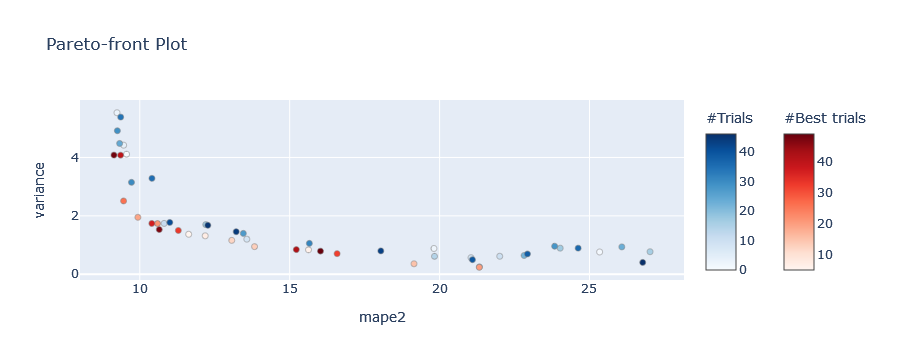

In [50]:
optuna.visualization.plot_pareto_front(study, target_names=["mape2", "variance"])

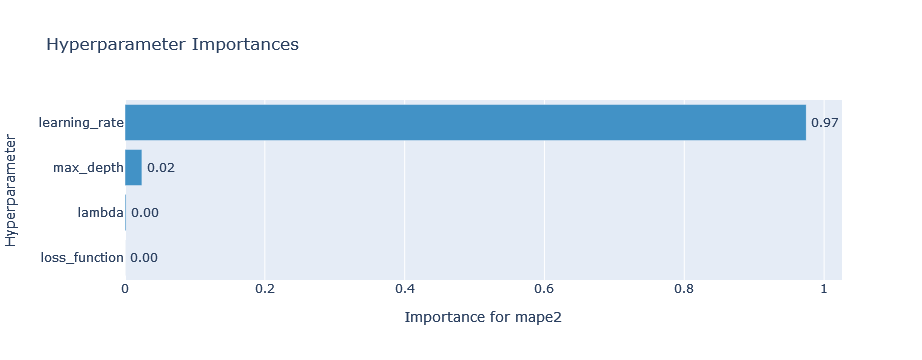

In [51]:
optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0], target_name="mape2")

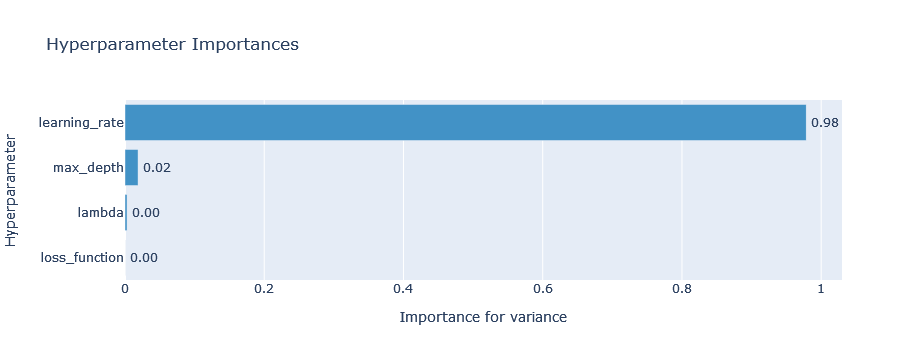

In [52]:
optuna.visualization.plot_param_importances(study, target=lambda t: t.values[0], target_name="variance")

In [ ]:
param={'one_hot_max_size':256,
       'iterations': 10000,
       'learning_rate': 0.0009402273445644647,
       'use_best_model': True, 
       #'od_type': 'Iter'
       #'od_wait': 10000, 
       'max_depth': 3,
       'l2_leaf_reg': 1.196467054178472,
       'loss_function':'RMSE'}
model=CatBoostRegressor(**param)
print(param)
model.fit(Train_set,eval_set=Eval_set,plot=False,verbose=False)
pred1 = model.predict(Pool(X_train,cat_features= cat_features1))
pred2 = model.predict(Pool(X_test,cat_features= cat_features1))
mape1 = (metrics.mean_absolute_percentage_error(pred1,Y_train))*100 
mape2 = (metrics.mean_absolute_percentage_error(pred2,Y_test))*100
print("The MAPE for train is", mape1)
print("The MAPE for test is", mape2)
